# <font color = 'gold'>데이터분석 경진대회 (JB7)
  - 분석주제 : 과거 구매 력과 현재 구매 정보를 활용하여, 현재 구매 할 만한 상품을 제안 및 예측


## <font color = 'red'>Overview
#### 1. 데이터 테이블 불러오기
#### 2. 데이터 조회 (Read Data)
#### 3. 데이터 결합 (Join Data)
#### 4. 데이터 정제 (Pre-Processing for Data Cleansing)
#### 5. 결측치 검증 (Data Validation)
#### 6. 변수 생성(새로운 컬럼 만들기)
#### 7. 변수를 통한 고객별 / 상품별 주문 특성 확인
#### 8. 모형 적용을 위한 New Data Set 생성
#### 9. 모형 적용 및 예측
#### 10. 최종 데이터 제출

# 1. 데이터 테이블 불러오기

In [1]:
from jbfg.pandas_utils import *

import numpy as np
import pandas as pd

In [2]:
schema = 'l2_jbbk_extnl'

In [3]:
sql_1 = 'SELECT * FROM products_info'
sql_2 = 'SELECT * FROM train_x_past'
sql_3 = 'SELECT * FROM train_x_current'
sql_4 = 'SELECT * FROM train_y'
sql_5 = 'SELECT * FROM test_x_past'
sql_6 = 'SELECT * FROM test_x_current'

In [4]:
df_products_info   = get_df(sql_1,schema)   #상품정보
df_train_x_past    = get_df(sql_2,schema)   #train_과거구매이력
df_train_x_current = get_df(sql_3,schema)   #train_최근주문정보
df_train_y         = get_df(sql_4,schema)   #train_최근주문상품
df_test_x_past     = get_df(sql_5,schema)   #test_과거구매이력
df_test_x_current  = get_df(sql_6,schema)   #test_미래주문정보

# 2. 데이터 조회

## 1) df_products_info

In [5]:
df_products_info

,product_id,name,category_id,division_id,category_name,division_name
0,21709,Sparkling Lemon Water,115,7,water seltzer sparkling water,beverages
1,20995,Organic Broccoli Florets,116,1,frozen produce,frozen
2,33000,Pure Irish Butter,36,16,butter,dairy eggs
3,7781,Organic Sticks Low Moisture Part Skim Mozzarel...,21,16,packaged cheese,dairy eggs
4,47144,Unsweetened Original Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs
...,...,...,...,...,...,...
95,47209,Organic Hass Avocado,24,4,fresh fruits,produce
96,21903,Organic Baby Spinach,123,4,packaged vegetables fruits,produce
97,21137,Organic Strawberries,24,4,fresh fruits,produce
98,13176,Bag of Organic Bananas,24,4,fresh fruits,produce


### 가. 상품데이터 대중분류 확인

In [6]:
df_products_info[['category_id','division_id','category_name','division_name']].drop_duplicates().sort_values(['division_name','category_name'])

,category_id,division_id,category_name,division_name
58,112,3,bread,bakery
17,31,7,refrigerated,beverages
10,77,7,soft drinks,beverages
0,115,7,water seltzer sparkling water,beverages
18,59,15,canned meals beans,canned goods
2,36,16,butter,dairy eggs
65,53,16,cream,dairy eggs
23,86,16,eggs,dairy eggs
7,84,16,milk,dairy eggs
3,21,16,packaged cheese,dairy eggs


### 나. 의심 데이터 확인 및 변환

In [7]:
df_products_info[df_products_info['category_name']=='4']

,product_id,name,category_id,division_id,category_name,division_name


<font color = 'pink'> → Data 오류건으로 재배포 Data 시 문제 해결

## 2) df_train_x_past

In [8]:
df_train_x_past

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id
0,717029,196613,15,1,9,3.0,5,0,41220
1,2325772,196613,35,6,11,2.0,7,1,41220
2,642668,196613,69,2,16,2.0,11,1,4210
3,1326515,196613,61,3,19,3.0,3,1,4210
4,1437845,196613,36,3,15,4.0,16,0,4210
...,...,...,...,...,...,...,...,...,...
1253967,1902783,163819,47,0,19,13.0,2,1,24852
1253968,1969590,163819,42,1,15,6.0,3,1,24852
1253969,2549215,163819,9,1,11,7.0,1,1,24852
1253970,3103211,163819,39,1,14,7.0,3,1,24852


## 3) df_train_x_current

In [9]:
df_train_x_current

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered
0,806422,41116,47,5,18,3.0,4,1
1,2146033,127113,45,1,10,7.0,24,1
2,3055498,140168,45,5,10,26.0,11,1
3,3267527,60604,52,0,16,8.0,2,1
4,3125992,136554,46,4,9,5.0,2,0
...,...,...,...,...,...,...,...,...
24419,3184000,174046,100,5,7,2.0,12,1
24420,1754722,6710,100,5,11,3.0,21,1
24421,1076973,150840,100,0,13,0.0,18,1
24422,1247049,99707,100,1,13,3.0,6,1


## 4) df_train_y

In [10]:
df_train_y

,product_id
0,21709
1,21709
2,21709
3,21709
4,21709
...,...
24419,24852
24420,24852
24421,24852
24422,24852


## 5) df_test_x_past

In [11]:
df_test_x_past

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id
0,117004,186630,37,4,11,3.0,12,1,21709
1,128658,186630,20,2,10,6.0,4,1,21709
2,165882,186630,56,3,15,5.0,10,1,21709
3,180165,186630,17,1,16,4.0,4,1,21709
4,394948,186630,46,5,11,7.0,7,1,21709
...,...,...,...,...,...,...,...,...,...
541917,2672845,119134,39,1,14,17.0,4,1,24852
541918,2731678,119134,38,5,14,3.0,4,1,24852
541919,2860406,119134,9,5,9,8.0,1,1,24852
541920,3252013,119134,4,5,10,7.0,2,1,24852


## 6) df_test_x_current

In [12]:
df_test_x_current

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered
0,3384204,37987,38,5,16,13.0,9,1
1,2578612,169022,38,6,10,7.0,4,1
2,188887,200090,45,5,16,30.0,5,1
3,646772,149416,39,1,13,13.0,15,1
4,300214,113836,42,3,10,17.0,1,1
...,...,...,...,...,...,...,...,...
16121,2047884,57077,46,5,15,8.0,2,1
16122,567625,83592,43,4,12,0.0,1,1
16123,596442,157740,49,6,10,3.0,2,1
16124,671102,92043,43,4,10,10.0,1,1


# 3. 데이터 결합

## 1) df_train_x_past + df_train_x_current + df_test_x_past + df_train_x_current + df_products_info 결합 : concat, merge 사용

<font color = 'pink'> → 변수 Type 변경 등을 위하여 전체 Data Set Join

In [13]:
# 각 테이블별 구분 컬럼 생성 > 추후 다시 나누기 위함
df1 = df_train_x_past.copy()
df1.insert(0,'gub','1')

df2 = df_train_x_current.copy()
df2.insert(0,'gub','2')

df3 = df_test_x_past.copy()
df3.insert(0,'gub','3')

df4 = df_test_x_current.copy()
df4.insert(0,'gub','4')

# current 테이블에 product_id 추가 > 실제 예측해야하는 df_train_x_current의 product_id는 모르므로 빈칸
df2 = pd.concat([df2, df_train_y],axis=1) #열방향

# 각테이블 합하기
df_f = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True) #행방향, index 새로 생성

# 상품정보 붙이기
dff_02 = pd.merge(df_f, df_products_info, on = ['product_id'], how = 'left')
dff_02

,gub,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,name,category_id,division_id,category_name,division_name
0,1,717029,196613,15,1,9,3.0,5,0,41220,Organic Romaine Lettuce,83,4,fresh vegetables,produce
1,1,2325772,196613,35,6,11,2.0,7,1,41220,Organic Romaine Lettuce,83,4,fresh vegetables,produce
2,1,642668,196613,69,2,16,2.0,11,1,4210,Whole Milk,84,16,milk,dairy eggs
3,1,1326515,196613,61,3,19,3.0,3,1,4210,Whole Milk,84,16,milk,dairy eggs
4,1,1437845,196613,36,3,15,4.0,16,0,4210,Whole Milk,84,16,milk,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836439,4,2047884,57077,46,5,15,8.0,2,1,NaN,NaN,NaN,NaN,NaN,NaN
1836440,4,567625,83592,43,4,12,0.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1836441,4,596442,157740,49,6,10,3.0,2,1,NaN,NaN,NaN,NaN,NaN,NaN
1836442,4,671102,92043,43,4,10,10.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN


# 4. 데이터정제

## 1) 문자형 변수 숫자형 변환

In [14]:
dff_02['order_number2']=pd.to_numeric(dff_02['order_number'])
dff_02['week_day2']=pd.to_numeric(dff_02['week_day'])
dff_02['order_hour2']=pd.to_numeric(dff_02['order_hour'])
dff_02['order_interval2']=pd.to_numeric(dff_02['order_interval']).fillna(0)
dff_02['add_order2']=pd.to_numeric(dff_02['add_order'])
dff_02['is_reordered2']=pd.to_numeric(dff_02['is_reordered'])

dff_02.tail()

,gub,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,...,category_id,division_id,category_name,division_name,order_number2,week_day2,order_hour2,order_interval2,add_order2,is_reordered2
1836439,4,2047884,57077,46,5,15,8.0,2,1,NaN,...,NaN,NaN,NaN,NaN,46,5,15,8.0,2,1
1836440,4,567625,83592,43,4,12,0.0,1,1,NaN,...,NaN,NaN,NaN,NaN,43,4,12,0.0,1,1
1836441,4,596442,157740,49,6,10,3.0,2,1,NaN,...,NaN,NaN,NaN,NaN,49,6,10,3.0,2,1
1836442,4,671102,92043,43,4,10,10.0,1,1,NaN,...,NaN,NaN,NaN,NaN,43,4,10,10.0,1,1
1836443,4,529654,62871,58,4,8,8.0,22,1,NaN,...,NaN,NaN,NaN,NaN,58,4,8,8.0,22,1


# 5. 결측치 확인

In [15]:
dff_02.isnull().sum()

gub                    0
order_id               0
cstno                  0
order_number           0
week_day               0
order_hour             0
order_interval         0
add_order              0
is_reordered           0
product_id         16126
name               16126
category_id        16126
division_id        16126
category_name      16126
division_name      16126
order_number2          0
week_day2              0
order_hour2            0
order_interval2        0
add_order2             0
is_reordered2          0
dtype: int64

<font color = 'pink'> → df_test_x_current 16,126개는 데이터 결측치가 맞음 (실제 예측해야하는 test_y값으로 상품정보 없음)

# 6. 새로운 컬럼 만들기

## 1) 주문여부

<font color = 'pink'> → 향후 분석 편의를 위하여 주문여부 칼럼 생성

In [16]:
#주문여부 컬럼생성
dff_02['order_yn']=1
dff_02.tail()

,gub,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,...,division_id,category_name,division_name,order_number2,week_day2,order_hour2,order_interval2,add_order2,is_reordered2,order_yn
1836439,4,2047884,57077,46,5,15,8.0,2,1,NaN,...,NaN,NaN,NaN,46,5,15,8.0,2,1,1
1836440,4,567625,83592,43,4,12,0.0,1,1,NaN,...,NaN,NaN,NaN,43,4,12,0.0,1,1,1
1836441,4,596442,157740,49,6,10,3.0,2,1,NaN,...,NaN,NaN,NaN,49,6,10,3.0,2,1,1
1836442,4,671102,92043,43,4,10,10.0,1,1,NaN,...,NaN,NaN,NaN,43,4,10,10.0,1,1,1
1836443,4,529654,62871,58,4,8,8.0,22,1,NaN,...,NaN,NaN,NaN,58,4,8,8.0,22,1,1


## 2) 시간 구분

<font color = 'pink'> → 시간 구분은 크게 4개의 Seg로 적용 (새벽 / 오전 / 오후 / 저녁)

In [17]:
# 1.00~05시, 2.06~11시, 3.12~17시, 4.18~23시
dff_02['order_hour_gub'] = dff_02['order_hour2'].apply(lambda x : '1' if x < 6 else '2' if x < 12 else '3' if x < 18 else '4')
dff_02['order_hour_gub2'] = pd.to_numeric(dff_02['order_hour_gub'])
dff_02.tail()

,gub,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,...,division_name,order_number2,week_day2,order_hour2,order_interval2,add_order2,is_reordered2,order_yn,order_hour_gub,order_hour_gub2
1836439,4,2047884,57077,46,5,15,8.0,2,1,NaN,...,NaN,46,5,15,8.0,2,1,1,3,3
1836440,4,567625,83592,43,4,12,0.0,1,1,NaN,...,NaN,43,4,12,0.0,1,1,1,3,3
1836441,4,596442,157740,49,6,10,3.0,2,1,NaN,...,NaN,49,6,10,3.0,2,1,1,2,2
1836442,4,671102,92043,43,4,10,10.0,1,1,NaN,...,NaN,43,4,10,10.0,1,1,1,2,2
1836443,4,529654,62871,58,4,8,8.0,22,1,NaN,...,NaN,58,4,8,8.0,22,1,1,2,2


## 3) 주문순서

<font color = 'pink'> → 기존 add_order가 띄엄띄엄 있어서 주문별로 다시 순서 구함\
<font color = 'pink'> → 주문서에 담기만하고 주문안한 상품이 있어서 그런게 아닐까 싶음

In [18]:
#고객별 주문별 담긴순서
dff_02['add_order3'] = dff_02.groupby(['cstno','order_number'])['add_order2'].rank(method='first',ascending=True)
dff_02.sort_values(['cstno','order_number','add_order2']).iloc[99:120,:]

,gub,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,...,order_number2,week_day2,order_hour2,order_interval2,add_order2,is_reordered2,order_yn,order_hour_gub,order_hour_gub2,add_order3
423544,1,793788,10000,27,3,8,4.0,2,1,21137,...,27,3,8,4.0,2,1,1,2,2,2.0
423591,1,793788,10000,27,3,8,4.0,3,1,24852,...,27,3,8,4.0,3,1,1,2,2,3.0
423416,1,793788,10000,27,3,8,4.0,4,1,26604,...,27,3,8,4.0,4,1,1,2,2,4.0
423447,1,793788,10000,27,3,8,4.0,11,1,44359,...,27,3,8,4.0,11,1,1,2,2,5.0
423479,1,1824260,10000,28,1,8,5.0,4,1,49235,...,28,1,8,5.0,4,1,1,2,2,1.0
423455,1,1824260,10000,28,1,8,5.0,5,1,27104,...,28,1,8,5.0,5,1,1,2,2,2.0
423600,1,1824260,10000,28,1,8,5.0,6,1,24852,...,28,1,8,5.0,6,1,1,2,2,3.0
423422,1,1824260,10000,28,1,8,5.0,7,1,26604,...,28,1,8,5.0,7,1,1,2,2,4.0
423557,1,1824260,10000,28,1,8,5.0,16,1,21137,...,28,1,8,5.0,16,1,1,2,2,5.0
423412,1,3272690,10000,3,1,11,2.0,2,1,5077,...,3,1,11,2.0,2,1,1,2,2,1.0


## 4) 고객별 최근 3건/10건 주문대상 (past 최근 3건, 10건 1 / 기타 0 / current는 무조건 1)

In [19]:
#고객별 최대추문횟수
last_order_num = dff_02.groupby(['cstno'])['order_number2'].max().reset_index(name='last_order_num')
dff_02 = pd.merge(dff_02, last_order_num, on = ['cstno'], how = 'left')

dff_02['order_num_cha'] = dff_02['last_order_num'] - dff_02['order_number2']
dff_02['order_last_10'] = dff_02['order_num_cha'].apply(lambda x : '1' if x < 11 else '0')
dff_02['order_last_3'] = dff_02['order_num_cha'].apply(lambda x : '1' if x < 4 else '0')

In [20]:
dff_02[(dff_02['cstno']=='92043')&((dff_02['order_number']=='39')|(dff_02['order_number']=='40'))].sort_values('order_number2')

,gub,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,...,add_order2,is_reordered2,order_yn,order_hour_gub,order_hour_gub2,add_order3,last_order_num,order_num_cha,order_last_10,order_last_3
1383572,3,806941,92043,39,5,11,7.0,5,1,22825,...,5,1,1,2,2,1.0,43,4,1,0
1481299,3,806941,92043,39,5,11,7.0,10,1,8518,...,10,1,1,2,2,5.0,43,4,1,0
1537898,3,806941,92043,39,5,11,7.0,9,1,4605,...,9,1,1,2,2,4.0,43,4,1,0
1577116,3,806941,92043,39,5,11,7.0,8,1,4920,...,8,1,1,2,2,3.0,43,4,1,0
1616218,3,806941,92043,39,5,11,7.0,15,0,39275,...,15,0,1,2,2,6.0,43,4,1,0
1703616,3,806941,92043,39,5,11,7.0,6,1,47766,...,6,1,1,2,2,2.0,43,4,1,0
1317362,3,851921,92043,40,4,12,6.0,6,1,23909,...,6,1,1,3,3,2.0,43,3,1,1
1383573,3,851921,92043,40,4,12,6.0,5,1,22825,...,5,1,1,3,3,1.0,43,3,1,1
1453533,3,851921,92043,40,4,12,6.0,7,1,39877,...,7,1,1,3,3,3.0,43,3,1,1
1703617,3,851921,92043,40,4,12,6.0,12,1,47766,...,12,1,1,3,3,4.0,43,3,1,1


# 7. df_train_x_past 주문 특성 확인

In [21]:
t_x_p = dff_02[dff_02['gub']=='1'].copy()

## 1) 고객별 최대주문횟수

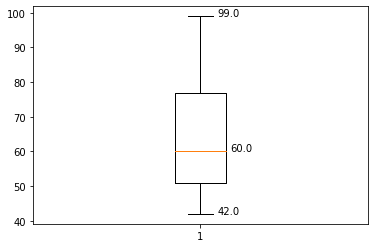

In [22]:
import matplotlib.pyplot as plt

#박스그림
d1 = t_x_p.groupby('cstno')['order_number2'].max()
plt.boxplot(d1)
plt.text(1.05,np.percentile(d1,100),np.percentile(d1,100))
plt.text(1.05,np.percentile(d1,0),np.percentile(d1,0))
plt.text(1.09,np.percentile(d1,50),np.percentile(d1,50))
plt.show()

<font color = 'pink'> → 고객당 최소 42번에서 최대 약 99번 가량 주문 (평균주문건수 약 60번)

## 2) 고객별 최대주문횟수별 고객수

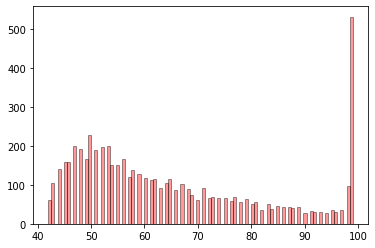

In [23]:
# reset_index() : 결과값 데이터프레임으로 저장
max_order_num = t_x_p.groupby('cstno')['order_number2'].max().reset_index()

#히스토그램
plt.hist(max_order_num['order_number2'], color='red', alpha=0.4, edgecolor='black', bins=max_order_num['order_number2'].max())
plt.show()

<font color = 'pink'> → 99번 주문한 고객이 532명으로 가장 많음

In [24]:
#데이터검증
t_x_p[t_x_p['order_number2']==99]['cstno'].drop_duplicates().reset_index()

,index,cstno
0,3540,98411
1,6690,32971
2,7132,210
3,7701,164055
4,10766,196877
...,...,...
527,1230310,32099
528,1237204,65039
529,1241850,65141
530,1242485,196224


## 3) 고객별 상품구매 최대개수

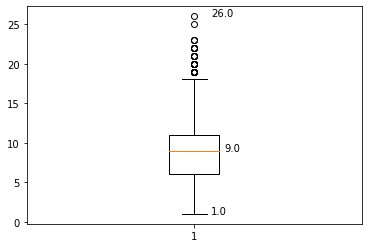

In [25]:
# 박스그림
d2 = t_x_p.groupby('cstno')['add_order3'].max()
plt.boxplot(d2)
plt.text(1.05,np.percentile(d2,100),np.percentile(d2,100))
plt.text(1.05,np.percentile(d2,0),np.percentile(d2,0))
plt.text(1.09,np.percentile(d2,50),np.percentile(d2,50))
plt.show()

<font color = 'pink'> → 한번 주문시 고객별 상품구매 최소 1건에서 최대 26건 가량 주문 (평균구매개수 약 9건)

## 4) 고객별 상품구매 최대개수별 고객수

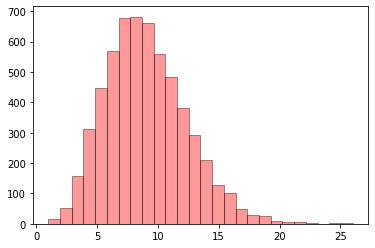

In [26]:
# reset_index() : 결과값 데이터프레임으로 저장
order_max = t_x_p.groupby('cstno')['add_order3'].max().reset_index().astype(int)

#히스토그램
plt.hist(order_max['add_order3'], color='red', alpha=0.4, edgecolor='black', bins=order_max['add_order3'].max())
plt.show()

<font color = 'pink'> → 대부분 고객의 경우 상품구매 시 6~10개 가량 주문

## 5) 구매경과일별 주문횟수현황

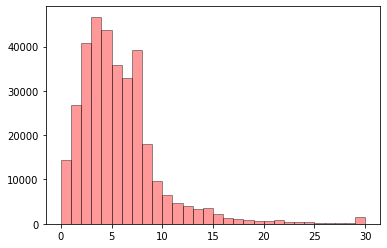

In [27]:
#중복제거
order_interval = t_x_p[['order_id','cstno','order_number','order_interval2']].drop_duplicates()

#히스토그램
plt.hist(order_interval['order_interval2'], color='red', alpha=0.4, edgecolor='black', bins=int(order_interval['order_interval2'].max()))
plt.show()

<font color = 'pink'> → 대체로 10일 내 재주문함 - 생각외로 빠른 시일내 재주문이 이루어진다

## 6) 주문요일별 주문횟수현황

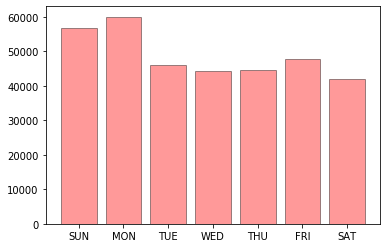

In [28]:
#중복제거
week_day = t_x_p[['order_id','cstno','order_number','week_day']].drop_duplicates()
week_day2 = week_day.groupby('week_day')['order_id'].count().reset_index()

#막대그래프
plt.bar(week_day2['week_day'],week_day2['order_id'], color='red', alpha=0.4, edgecolor='black')
plt.xticks(['0','1','2','3','4','5','6'],labels=['SUN','MON','TUE','WED','THU','FRI','SAT'])
plt.show()

# 0 : 일요일 ~ 6 : 토요일

<font color = 'pink'> → 주중에서 특히 화/수/목요일엔 주문량 낮으며 일요일과 월요일에서 주문량 증가

## 7) 주문요일별&주문시간별 주문횟수현황

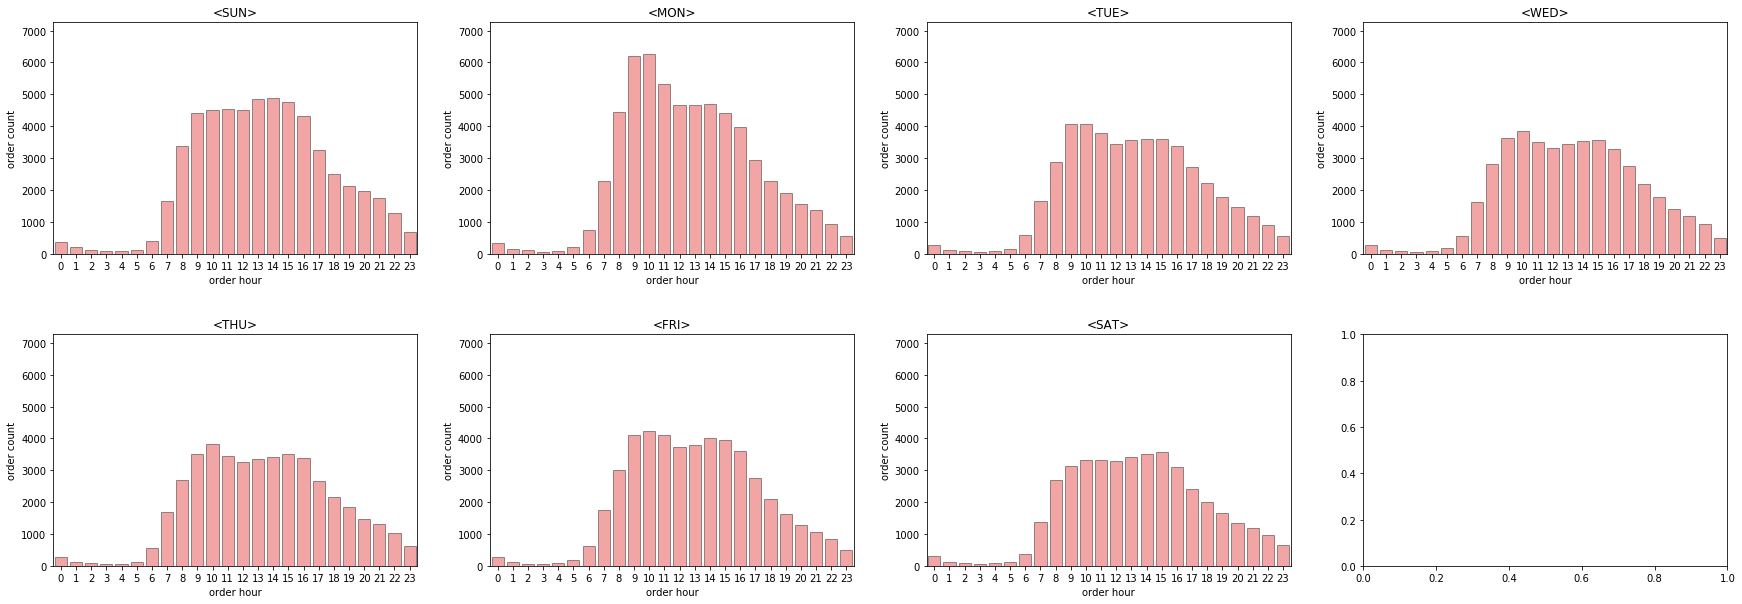

In [29]:
import seaborn as sns

#중복제거
order_week_hour = t_x_p[['order_id','cstno','order_number','week_day','order_hour2']].drop_duplicates()
order_week_hour2 = order_week_hour.groupby(['week_day','order_hour2'])['order_id'].count().reset_index()

wlist=list(order_week_hour2['week_day'].drop_duplicates())
max_val=np.ceil(max(order_week_hour2['order_id']))

fig, ax = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches((30,10))
plt.subplots_adjust(hspace=0.35)

for i,w in enumerate(wlist):
    sns.barplot(x = 'order_hour2', y = 'order_id', data=order_week_hour2[order_week_hour2['week_day']==w], ax = ax[int(i/4),int(i%4)] , color='red', alpha=0.4, edgecolor='black')
    ax[int(i/4),int(i%4)].set_xlabel('order hour')
    ax[int(i/4),int(i%4)].set_ylabel('order count')
    ax[int(i/4),int(i%4)].set_ylim(0,max_val+1000)
    
    if w=='0' :
        title = '<SUN>'
    elif w=='1' :
         title = '<MON>'
    elif w=='2' :
         title = '<TUE>'
    elif w=='3' :
         title = '<WED>'
    elif w=='4' :
         title = '<THU>'
    elif w=='5' :
         title = '<FRI>'            
    elif w=='6' :
         title = '<SAT>'                                
    ax[int(i/4),int(i%4)].set_title(title)
    
plt.show()

<font color = 'pink'> → 대체로 오후시간대에 주문하는 형태 / 월요일 오전에 가장 많음 / 주말 전 주문이 많을것으로 예상했지만 아닌부분은 특이함

## 8) 상품카테고리별 구매수

### 가. 첫구매시

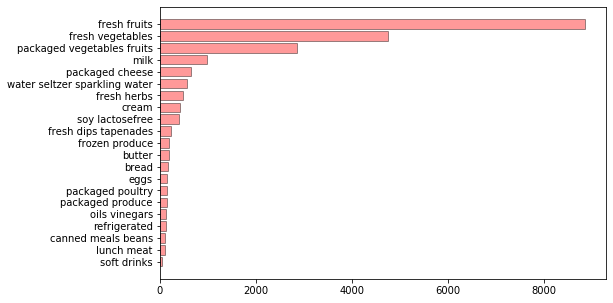

In [30]:
df_train_x_past_first=t_x_p[t_x_p['order_number']=='1'].copy()
df_train_x_past_first_02=df_train_x_past_first.groupby(['category_name','division_name','category_id'])['product_id'].count().reset_index().sort_values(['product_id'], ascending=True)

plt.figure(figsize=(8,5))
plt.barh(df_train_x_past_first_02['category_name'], df_train_x_past_first_02['product_id'], color='red', alpha=0.4, edgecolor='black')
plt.show()

<font color = 'pink'> → 처음 주문시 fresh 제품 구매가 주를 이루며, fresh 제품이기에 주문기간이 대체로 짧은 것으로 보임

### 나. 과거 마지막 구매시

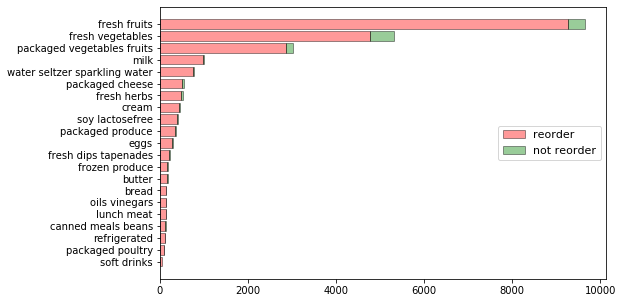

In [31]:
df_train_x_past_last_num = t_x_p.groupby(['cstno'])['order_number2'].max().reset_index(name='max_order_number2')
df_train_x_past_02_last_temp = pd.merge(t_x_p, df_train_x_past_last_num, on = ['cstno'], how = 'left')

df_train_x_past_last = df_train_x_past_02_last_temp[df_train_x_past_02_last_temp['order_number2']==df_train_x_past_02_last_temp['max_order_number2']]
df_train_x_past_last_02 = df_train_x_past_last.groupby(['category_name','is_reordered'])['product_id'].count().reset_index(name='product_num').sort_values(['product_num'], ascending=True)

df_train_x_past_last_02_r1 = df_train_x_past_last_02[df_train_x_past_last_02['is_reordered']=='1']
df_train_x_past_last_02_r0 = df_train_x_past_last_02[df_train_x_past_last_02['is_reordered']=='0']

df_train_x_past_last_03 = pd.merge(df_train_x_past_last_02_r1, df_train_x_past_last_02_r0, on = ['category_name'], how ='outer')

plt.figure(figsize=(8,5))
p1=plt.barh(df_train_x_past_last_03['category_name'], df_train_x_past_last_03['product_num_x'], color='red', alpha=0.4, edgecolor='black')
p2=plt.barh(df_train_x_past_last_03['category_name'], df_train_x_past_last_03['product_num_y'], left=df_train_x_past_last_03['product_num_x'], color='green', alpha=0.4, edgecolor='black')
plt.legend((p1[0],p2[0]),('reorder','not reorder'),fontsize=11)
plt.show()

<font color = 'pink'> → 과거 마지막 주문시에도 fresh 제품 구매가 주를 이루며, 첫주문시와 비슷한 양상을 보임

## 9) 고객별 상품 구매건수 평균

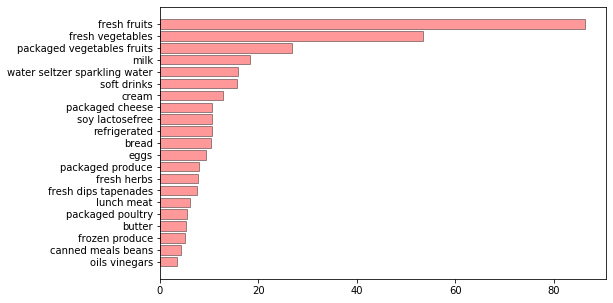

In [32]:
df_train_x_past_cst_pro=t_x_p.groupby(['cstno','category_id','category_name','division_name'])['order_number'].count().reset_index().sort_values(['cstno','order_number'])
df_train_x_past_cst_pro2=df_train_x_past_cst_pro.groupby(['category_name']).mean('order_number').reset_index().sort_values(['order_number'], ascending=True)

plt.figure(figsize=(8,5))
plt.barh(df_train_x_past_cst_pro2['category_name'], df_train_x_past_cst_pro2['order_number'], color='red', alpha=0.4, edgecolor='black')
plt.show()

## 10) 주문회차별&상품별 구매수

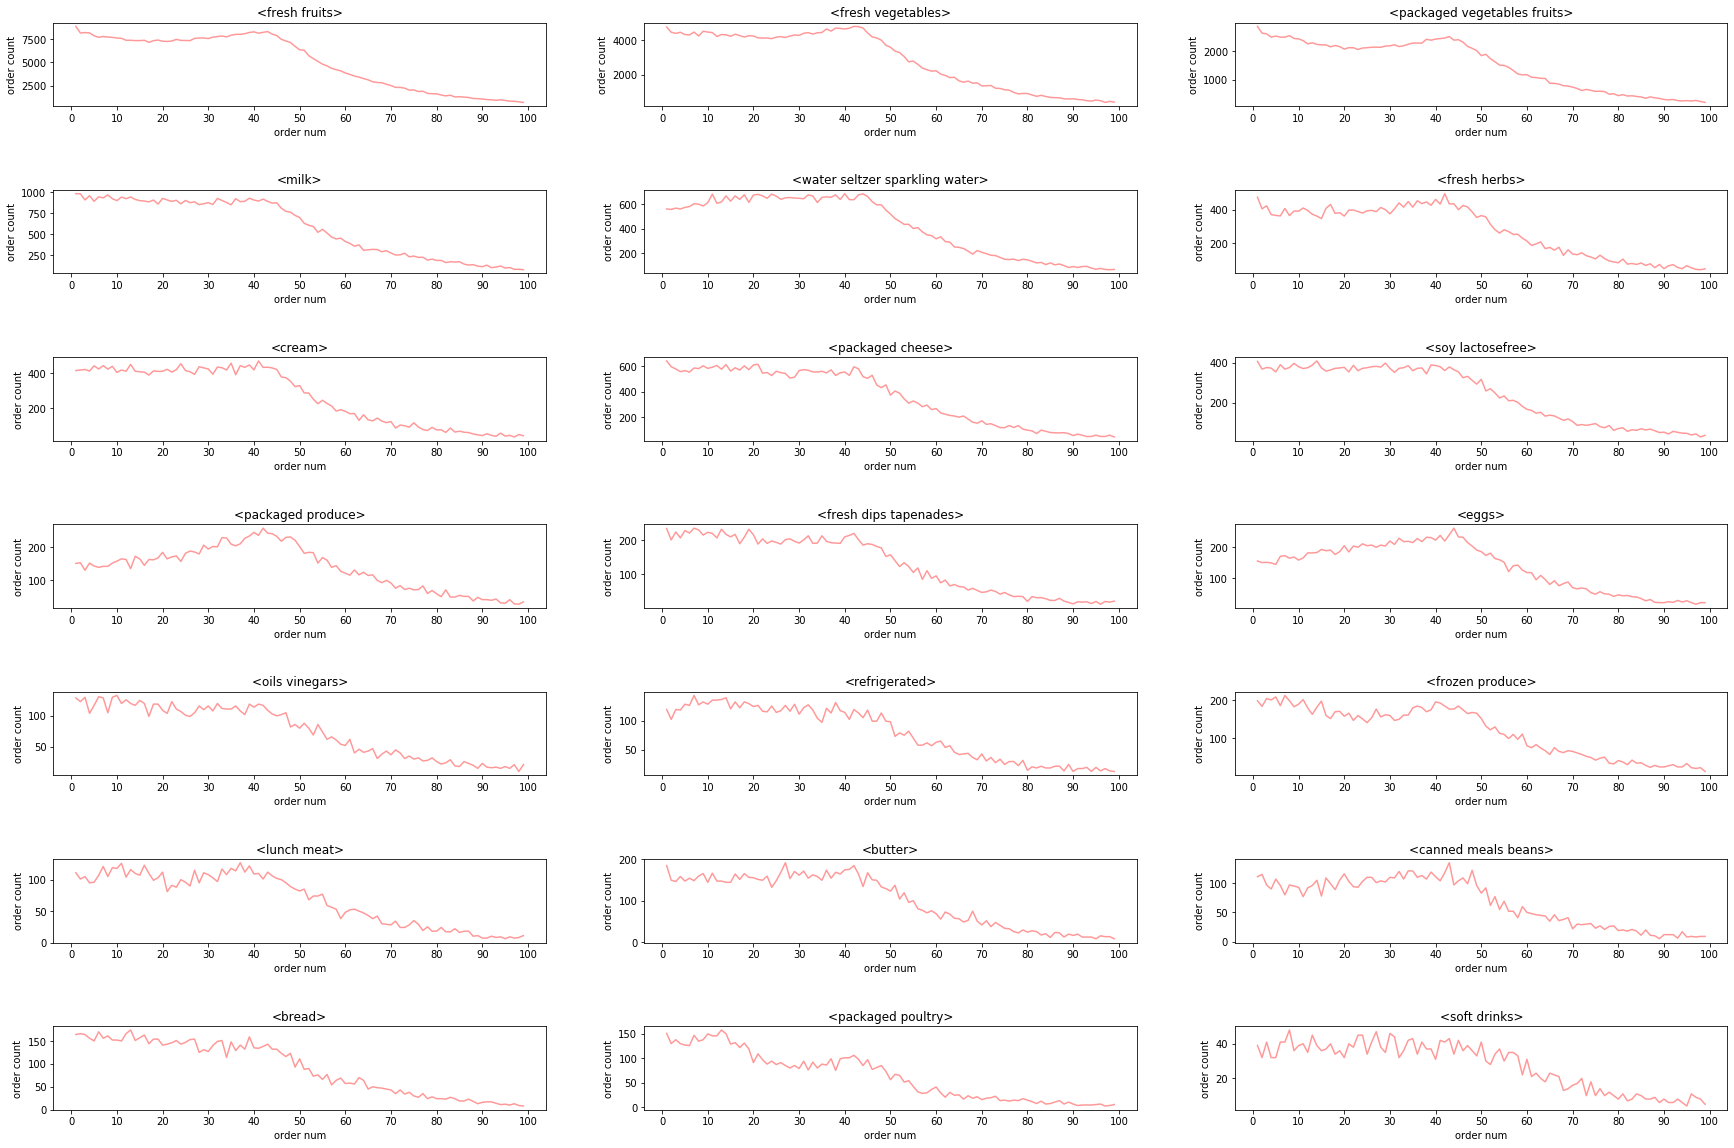

In [33]:
df_train_x_past_pro=t_x_p.groupby(['order_number2','category_name'])['product_id'].count().reset_index().sort_values(['order_number2','product_id'], ascending=False)
df_train_x_past_pro

plist=list(df_train_x_past_pro['category_name'].drop_duplicates())
max_val_order=np.ceil(max(df_train_x_past_pro['order_number2']))
major_xticks = [i for i in range(0,int(max_val_order)+10,10)]

fig, ax = plt.subplots(nrows=7, ncols=3)
fig.set_size_inches((30,20))
plt.subplots_adjust(hspace=1.0)

for i,w in enumerate(plist):
    sns.lineplot(x = 'order_number2', y = 'product_id', data=df_train_x_past_pro[df_train_x_past_pro['category_name']==w], ax = ax[int(i/3),int(i%3)] , color='red', alpha=0.4)
    ax[int(i/3),int(i%3)].set_xlabel('order num')
    ax[int(i/3),int(i%3)].set_ylabel('order count')                               
    ax[int(i/3),int(i%3)].set_title('<'+w+'>')
    ax[int(i/3),int(i%3)].set_xticks(major_xticks)
    
plt.show()

<font color = 'pink'> → 'category'별로 보았을때는 크게 특이점을 찾을 수 없음

## 11) 주문경과일수별&상품별 구매수

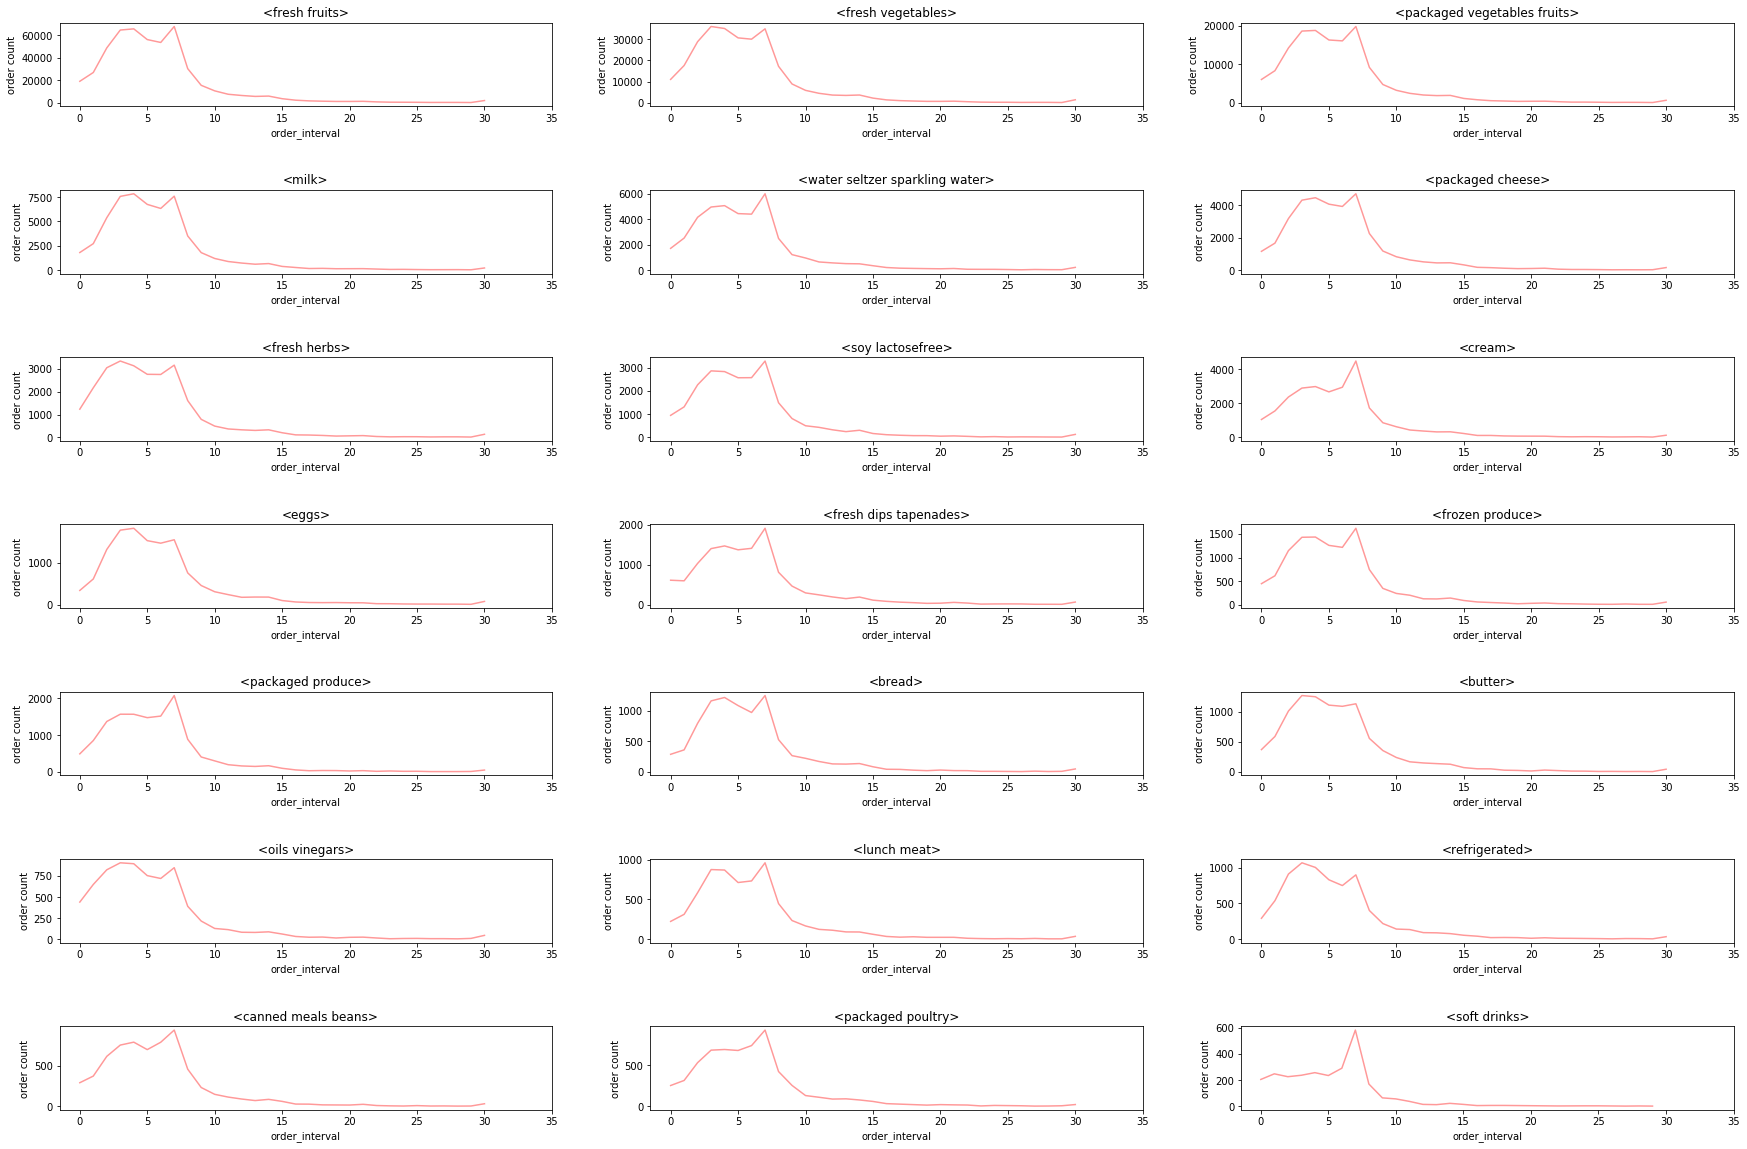

In [34]:
df_train_x_past_inter=t_x_p.groupby(['order_interval2','category_name'])['product_id'].count().reset_index().sort_values(['order_interval2','product_id'], ascending=False)
df_train_x_past_inter

plist=list(df_train_x_past_inter['category_name'].drop_duplicates())
max_val_inter=np.ceil(max(df_train_x_past_inter['order_interval2']))
major_xticks_inter = [i for i in range(0,int(max_val_inter)+10,5)]

fig, ax = plt.subplots(nrows=7, ncols=3)
fig.set_size_inches((30,20))
plt.subplots_adjust(hspace=1.0)

for i,w in enumerate(plist):
    sns.lineplot(x = 'order_interval2', y = 'product_id', data=df_train_x_past_inter[df_train_x_past_inter['category_name']==w], ax = ax[int(i/3),int(i%3)] , color='red', alpha=0.4)
    ax[int(i/3),int(i%3)].set_xlabel('order_interval')
    ax[int(i/3),int(i%3)].set_ylabel('order count')                               
    ax[int(i/3),int(i%3)].set_title('<'+w+'>')
    ax[int(i/3),int(i%3)].set_xticks(major_xticks_inter)
    
plt.show()

<font color = 'pink'> → 마찬가지로 크게 특이사항 찾을 수 없음

## 12) 고객 특정상품 구매율 분석 test

In [35]:
#상품리스트
prod_list=t_x_p['product_id'].drop_duplicates().reset_index()
prod_list['gub']='1'
prod_list2=list(prod_list['product_id'])

#고객리스트
cst_list=t_x_p['cstno'].drop_duplicates().reset_index()
cst_list['gub']='1'
cst_list2=list(cst_list['cstno'])

#구매회차리스트
order_list=t_x_p['order_number2'].drop_duplicates().reset_index()
order_list['gub']='1'
order_list2=list(order_list['order_number2'])

all_list = pd.merge(cst_list[['gub','cstno']], order_list[['gub','order_number2']], on='gub', how = 'outer').sort_values(['cstno','order_number2'])

In [36]:
#고객별 최대추문횟수 컬럼생성
df_train_x_past_last_num = t_x_p.groupby(['cstno'])['order_number2'].max().reset_index(name='max_order_num2')

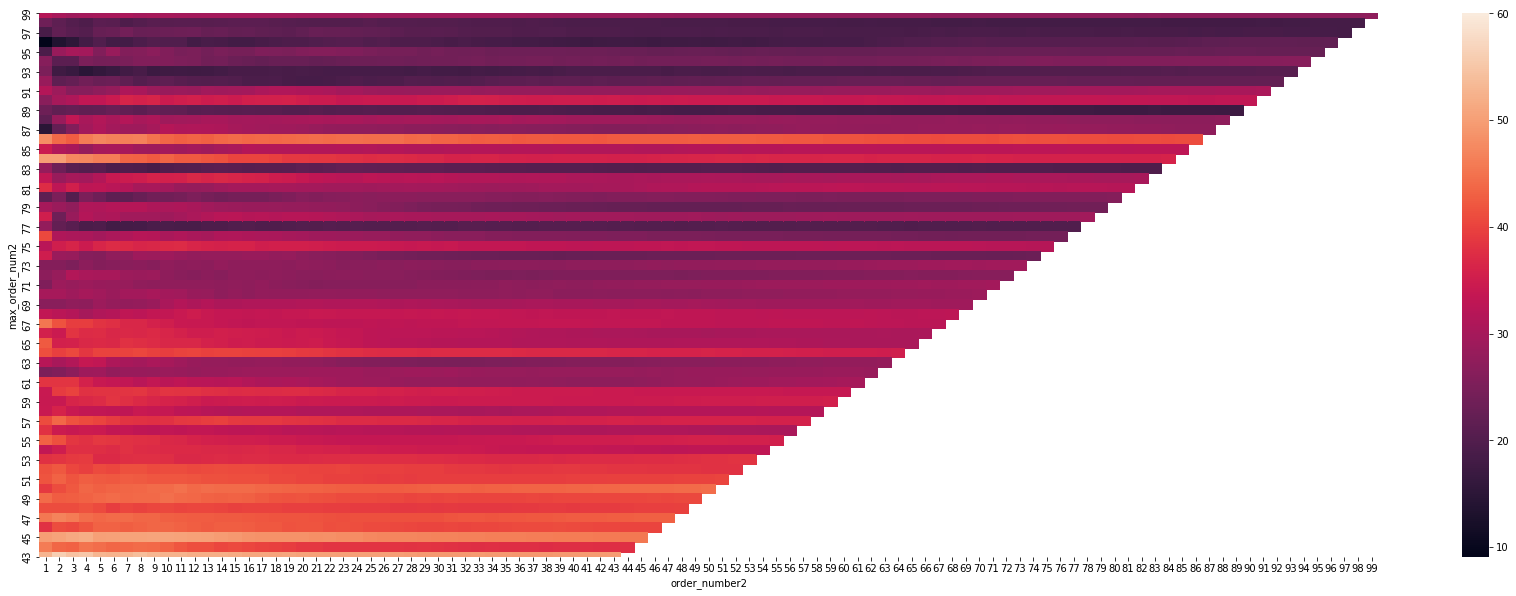

In [37]:
#Banana 테스트	

prdt=['24852']

for i in prdt :
    #해당상품 추출
    globals()['df_train_x_past_'+i] = t_x_p[t_x_p['product_id']==i].sort_values(['cstno','order_number2'])

    #해당상품 전체 임시목록
    globals()['df_train_x_past_'+i+'_02'] = pd.merge(all_list, globals()['df_train_x_past_'+i][['cstno','order_number2','order_yn']], on =['cstno','order_number2'], how = 'left')
    globals()['df_train_x_past_'+i+'_02'] = pd.merge(globals()['df_train_x_past_'+i+'_02'], df_train_x_past_last_num, on = ['cstno'], how = 'left')

    #고객별 최대주문횟수보다 적거나 같은 경우만 대상
    globals()['df_train_x_past_'+i+'_03'] = globals()['df_train_x_past_'+i+'_02'][(globals()['df_train_x_past_'+i+'_02']['max_order_num2']>=globals()['df_train_x_past_'+i+'_02']['order_number2'])]
    
    #해당상품 주문고객 대상
    df_train_x_past_pro_sum = globals()['df_train_x_past_'+i+'_03'].groupby(['cstno'])['order_yn'].sum().reset_index(name='order_sum2')
    globals()['df_train_x_past_'+i+'_04'] = pd.merge(globals()['df_train_x_past_'+i+'_03'], df_train_x_past_pro_sum, on =['cstno'], how = 'left')
    globals()['df_train_x_past_'+i+'_04']  = globals()['df_train_x_past_'+i+'_04'] [globals()['df_train_x_past_'+i+'_04']['order_sum2']>0]

    #안붙는거는 미주문으로 0입력
    globals()['df_train_x_past_'+i+'_04'] ['order_yn'] = globals()['df_train_x_past_'+i+'_04'] ['order_yn'].fillna(0)
    
    #고객별 해당상품 누적구매수
    globals()['df_train_x_past_'+i+'_04'] ['cum_order'] = globals()['df_train_x_past_'+i+'_04'] .groupby(['cstno'])['order_yn'].cumsum()
    
    #구매율
    globals()['df_train_x_past_'+i+'_04'] ['order_rate'] = globals()['df_train_x_past_'+i+'_04'] ['cum_order'] / globals()['df_train_x_past_'+i+'_04'] ['order_number2'] * 100
    
    #피벗테이블 평균
    globals()['df_train_x_past_'+i+'_05']=globals()['df_train_x_past_'+i+'_04'].pivot_table(index='max_order_num2',columns='order_number2',values='order_rate',aggfunc='mean').sort_values(['max_order_num2'], ascending=False)
    
    #최대주문횟수별&해당주문횟수별 평균 구매율
    #globals()['df_train_x_past_'+i+'_f']  = globals()['df_train_x_past_'+i+'_04'] .groupby(['max_order_num2','order_number2'])['order_rate'].mean().reset_index(name='avg_order_rate')
    #globals()['df_train_x_past_'+i+'_f'] 
    
plt.figure(figsize=(30,10))
sns.heatmap(df_train_x_past_24852_05)
plt.show()

# 8. 새로운 테이블 만들기

## 1) 구매상품대상

<font color = 'pink'> → 'gub' 1,3번 : 과거구매(train,test) 데이터   // 'gub' 2,4번 : 현재구매(train,test) 데이터

In [38]:
dff_03 = dff_02.copy()
dff_03_past = dff_03[(dff_03['gub']=='1')|(dff_03['gub']=='3')]
dff_03_current = dff_03[(dff_03['gub']=='2')|(dff_03['gub']=='4')]

### 가. 기준목록 생성(고객, 상품, current 정보)

In [39]:
dff_03_past_00 = dff_03_past[['gub','cstno','product_id','name','category_id','category_name','division_id','division_name']].drop_duplicates()
dff_03_past_00

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce
2,1,196613,4210,Whole Milk,84,milk,16,dairy eggs
5,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs
22,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce
24,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce
...,...,...,...,...,...,...,...,...
1820235,3,172548,24852,Banana,24,fresh fruits,4,produce
1820271,3,45698,24852,Banana,24,fresh fruits,4,produce
1820272,3,33804,24852,Banana,24,fresh fruits,4,produce
1820288,3,190433,24852,Banana,24,fresh fruits,4,produce


In [40]:
# current 주문시 고객별 요일, 시간, 구매기간 붙이기
dff_03_past_00 = pd.merge(dff_03_past_00, dff_03_current[['cstno','week_day2','order_hour_gub2','order_interval2']].drop_duplicates(), on = ['cstno'], how = 'left')
dff_03_past_00.rename(columns = {'week_day2':'week_day2_y', 'order_hour_gub2':'order_hour_gub2_y', 'order_interval2':'order_interval2_y'}, inplace=True)

# current 주문시 고객별, 상품별 주문여부 붙이기
dff_03_past_00 = pd.merge(dff_03_past_00, dff_03_current[['cstno','product_id','order_yn']].drop_duplicates(), on = ['cstno','product_id'], how = 'left').fillna(0)
dff_03_past_00.rename(columns = {'order_yn':'product_yn_y'}, inplace=True)

# current 주문시 고객별, 카테고리별 주문여부 붙이기
dff_03_past_00 = pd.merge(dff_03_past_00, dff_03_current[['cstno','category_id','order_yn']].drop_duplicates(), on = ['cstno','category_id'], how = 'left').fillna(0)
dff_03_past_00.rename(columns = {'order_yn':'category_yn_y'}, inplace=True)

dff_03_past_00

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name,week_day2_y,order_hour_gub2_y,order_interval2_y,product_yn_y,category_yn_y
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce,6,3,5.0,0.0,0.0
1,1,196613,4210,Whole Milk,84,milk,16,dairy eggs,6,3,5.0,0.0,0.0
2,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs,6,3,5.0,0.0,0.0
3,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce,6,3,5.0,1.0,1.0
4,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce,6,3,5.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,172548,24852,Banana,24,fresh fruits,4,produce,6,3,30.0,0.0,0.0
268397,3,45698,24852,Banana,24,fresh fruits,4,produce,5,2,17.0,0.0,0.0
268398,3,33804,24852,Banana,24,fresh fruits,4,produce,3,4,4.0,0.0,0.0
268399,3,190433,24852,Banana,24,fresh fruits,4,produce,6,3,0.0,0.0,0.0


### 나. 고객별 상품별 최종 구매율

In [41]:
#고객별 최대추문횟수 컬럼생성
df_x_past_last_num = dff_03_past.groupby(['cstno'])['order_number2'].max().reset_index(name='max_order_num2')
dff_03_past_01 = pd.merge(dff_03_past_00, df_x_past_last_num, on = ['cstno'], how = 'left')
dff_03_past_01

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name,week_day2_y,order_hour_gub2_y,order_interval2_y,product_yn_y,category_yn_y,max_order_num2
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce,6,3,5.0,0.0,0.0,98
1,1,196613,4210,Whole Milk,84,milk,16,dairy eggs,6,3,5.0,0.0,0.0,98
2,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs,6,3,5.0,0.0,0.0,98
3,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce,6,3,5.0,1.0,1.0,98
4,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce,6,3,5.0,0.0,1.0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,172548,24852,Banana,24,fresh fruits,4,produce,6,3,30.0,0.0,0.0,41
268397,3,45698,24852,Banana,24,fresh fruits,4,produce,5,2,17.0,0.0,0.0,44
268398,3,33804,24852,Banana,24,fresh fruits,4,produce,3,4,4.0,0.0,0.0,43
268399,3,190433,24852,Banana,24,fresh fruits,4,produce,6,3,0.0,0.0,0.0,44


In [42]:
#고객별 상품별 구매 누적합, 구매율
df_train_x_past_pr_or_sum = dff_03_past.groupby(['cstno','product_id'])['order_yn'].sum().reset_index(name='prdt_order_sum')
dff_03_past_01 = pd.merge(dff_03_past_01, df_train_x_past_pr_or_sum, on = ['cstno','product_id'], how = 'left')
dff_03_past_01['order_rate'] = dff_03_past_01['prdt_order_sum'] / dff_03_past_01['max_order_num2'] * 100
dff_03_past_01

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name,week_day2_y,order_hour_gub2_y,order_interval2_y,product_yn_y,category_yn_y,max_order_num2,prdt_order_sum,order_rate
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce,6,3,5.0,0.0,0.0,98,2,2.040816
1,1,196613,4210,Whole Milk,84,milk,16,dairy eggs,6,3,5.0,0.0,0.0,98,3,3.061224
2,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs,6,3,5.0,0.0,0.0,98,17,17.346939
3,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce,6,3,5.0,1.0,1.0,98,2,2.040816
4,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce,6,3,5.0,0.0,1.0,98,8,8.163265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,172548,24852,Banana,24,fresh fruits,4,produce,6,3,30.0,0.0,0.0,41,36,87.804878
268397,3,45698,24852,Banana,24,fresh fruits,4,produce,5,2,17.0,0.0,0.0,44,1,2.272727
268398,3,33804,24852,Banana,24,fresh fruits,4,produce,3,4,4.0,0.0,0.0,43,16,37.209302
268399,3,190433,24852,Banana,24,fresh fruits,4,produce,6,3,0.0,0.0,0.0,44,5,11.363636


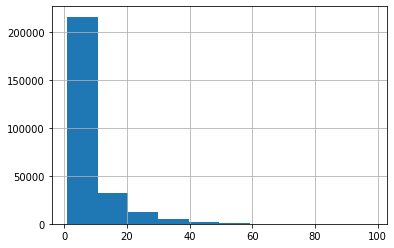

In [43]:
dff_03_past_01['prdt_order_sum'].hist()

### 다. 고객별 구매시 상품 담은 평균, 최소 순서

In [44]:
#고객별 상품별 담긴순서 평균, 최소
mean_add = dff_03_past.groupby(['cstno','product_id'])['add_order3'].mean().astype(int).reset_index(name='mean_add_order3')
dff_03_past_02 = pd.merge(dff_03_past_01, mean_add, on = ['cstno','product_id'], how = 'left')

min_add = dff_03_past.groupby(['cstno','product_id'])['add_order3'].min().reset_index(name='min_add_order3')
dff_03_past_02 = pd.merge(dff_03_past_02, min_add, on = ['cstno','product_id'], how = 'left')

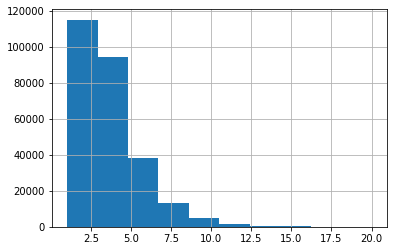

In [45]:
dff_03_past_02['mean_add_order3'].hist()

In [46]:
# 1.2번이내, 2.4번이내, 3.6번이내, 4.8번이내, 5.10번이내, 6.10번초과
dff_03_past_02['mean_add_order3_gub'] = dff_03_past_02['mean_add_order3'].apply(lambda x : '1' if x < 3 else '2' if x < 5 \
                                                                                else '3' if x < 7 else '4' if x < 9 \
                                                                                else '5' if x < 11 else '6')

dff_03_past_02

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name,week_day2_y,order_hour_gub2_y,order_interval2_y,product_yn_y,category_yn_y,max_order_num2,prdt_order_sum,order_rate,mean_add_order3,min_add_order3,mean_add_order3_gub
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce,6,3,5.0,0.0,0.0,98,2,2.040816,1,1.0,1
1,1,196613,4210,Whole Milk,84,milk,16,dairy eggs,6,3,5.0,0.0,0.0,98,3,3.061224,2,1.0,1
2,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs,6,3,5.0,0.0,0.0,98,17,17.346939,2,1.0,1
3,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce,6,3,5.0,1.0,1.0,98,2,2.040816,1,1.0,1
4,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce,6,3,5.0,0.0,1.0,98,8,8.163265,2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,172548,24852,Banana,24,fresh fruits,4,produce,6,3,30.0,0.0,0.0,41,36,87.804878,4,1.0,2
268397,3,45698,24852,Banana,24,fresh fruits,4,produce,5,2,17.0,0.0,0.0,44,1,2.272727,5,5.0,3
268398,3,33804,24852,Banana,24,fresh fruits,4,produce,3,4,4.0,0.0,0.0,43,16,37.209302,1,1.0,1
268399,3,190433,24852,Banana,24,fresh fruits,4,produce,6,3,0.0,0.0,0.0,44,5,11.363636,2,1.0,1


### 라. 고객별 상품별 상품담은 순서

In [47]:
# 1.2번이내, 2.4번이내, 3.6번이내, 4.8번이내, 5.10번이내, 6.10번초과
dff_03_past_temp = dff_03_past.copy()
dff_03_past_temp['add_order3_gub'] = dff_03_past_temp['add_order3'].apply(lambda x : '1' if x < 3 else '2' if x < 5 \
                                                                          else '3' if x < 7 else '4' if x < 9 \
                                                                          else '5' if x < 11 else '6')

#피벗테이블 고객별 상품별 상품담은순서별 합계
df_x_past_add_sum = dff_03_past_temp.pivot_table(index=['cstno','product_id'],columns='add_order3_gub',values='order_yn',aggfunc='sum').sort_values(['cstno','product_id'], ascending=False).fillna(0)
df_x_past_add_sum.reset_index(inplace=True)

df_x_past_add_sum['add'] = df_x_past_add_sum['1'].apply(lambda x : '1' if x > 0 else '0')\
                           + df_x_past_add_sum['2'].apply(lambda x : '1' if x > 0 else '0')\
                           + df_x_past_add_sum['3'].apply(lambda x : '1' if x > 0 else '0')\
                           + df_x_past_add_sum['4'].apply(lambda x : '1' if x > 0 else '0')\
                           + df_x_past_add_sum['5'].apply(lambda x : '1' if x > 0 else '0')\
                           + df_x_past_add_sum['6'].apply(lambda x : '1' if x > 0 else '0')

df_x_past_add_sum['a1'] = df_x_past_add_sum['1'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_add_sum['a2'] = df_x_past_add_sum['2'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_add_sum['a3'] = df_x_past_add_sum['3'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_add_sum['a4'] = df_x_past_add_sum['4'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_add_sum['a5'] = df_x_past_add_sum['5'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_add_sum['a6'] = df_x_past_add_sum['6'].apply(lambda x : 1 if x > 0 else 0)

dff_03_past_02 = pd.merge(dff_03_past_02, df_x_past_add_sum[['cstno','product_id','add','a1','a2','a3','a4','a5','a6']], on = ['cstno','product_id'], how = 'left')
dff_03_past_02

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name,week_day2_y,order_hour_gub2_y,...,mean_add_order3,min_add_order3,mean_add_order3_gub,add,a1,a2,a3,a4,a5,a6
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce,6,3,...,1,1.0,1,100000,1,0,0,0,0,0
1,1,196613,4210,Whole Milk,84,milk,16,dairy eggs,6,3,...,2,1.0,1,110000,1,1,0,0,0,0
2,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs,6,3,...,2,1.0,1,111000,1,1,1,0,0,0
3,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce,6,3,...,1,1.0,1,100000,1,0,0,0,0,0
4,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce,6,3,...,2,1.0,1,110000,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,172548,24852,Banana,24,fresh fruits,4,produce,6,3,...,4,1.0,2,111110,1,1,1,1,1,0
268397,3,45698,24852,Banana,24,fresh fruits,4,produce,5,2,...,5,5.0,3,001000,0,0,1,0,0,0
268398,3,33804,24852,Banana,24,fresh fruits,4,produce,3,4,...,1,1.0,1,110000,1,1,0,0,0,0
268399,3,190433,24852,Banana,24,fresh fruits,4,produce,6,3,...,2,1.0,1,110000,1,1,0,0,0,0


### 마. 고객별 상품별 재구매 평균기간

In [48]:
#고객별 구매기간, 구매기간 누적합
df_x_past_int_temp = dff_03_past[['cstno','order_number2','order_interval2']].drop_duplicates().sort_values(['cstno','order_number2'])
df_x_past_int_temp['order_inter_sum'] = df_x_past_int_temp.groupby(['cstno'])['order_interval2'].cumsum()

df_x_past_int_temp

,cstno,order_number2,order_interval2,order_inter_sum
423306,10000,1,0.0,0.0
423288,10000,2,6.0,6.0
423308,10000,3,2.0,8.0
423309,10000,4,3.0,11.0
423336,10000,5,0.0,11.0
...,...,...,...,...
1417961,99990,33,7.0,273.0
1313547,99990,34,22.0,295.0
1341436,99990,35,6.0,301.0
1473124,99990,36,9.0,310.0


In [49]:
# 고객별 상품별 join
df_x_past_cst_pr = dff_03_past[['cstno','product_id','order_number2','is_reordered']].drop_duplicates().sort_values(['cstno','product_id','order_number2'])
df_x_past_cst_pr_02 = pd.merge(df_x_past_cst_pr, df_x_past_int_temp, on = ['cstno','order_number2'], how = 'left')
df_x_past_cst_pr_02.iloc[100:120,]

,cstno,product_id,order_number2,is_reordered,order_interval2,order_inter_sum
100,10000,21903,63,1,3.0,269.0
101,10000,21903,68,1,9.0,296.0
102,10000,22035,8,0,9.0,28.0
103,10000,22035,10,1,3.0,36.0
104,10000,22035,33,1,1.0,131.0
105,10000,22035,38,1,2.0,153.0
106,10000,22035,39,1,5.0,158.0
107,10000,22035,49,1,7.0,212.0
108,10000,22035,50,1,6.0,218.0
109,10000,22035,52,1,7.0,225.0


In [50]:
# 고객별 상품별 누적합 차이
groups = df_x_past_cst_pr_02.groupby(['cstno','product_id'])
df_x_past_cst_pr_02['order_inter_sum_shift'] = groups[['order_inter_sum']].shift(1).fillna(0)
df_x_past_cst_pr_02['prdt_order_int_sum'] = df_x_past_cst_pr_02['order_inter_sum'] - df_x_past_cst_pr_02['order_inter_sum_shift'] 
df_x_past_cst_pr_02.iloc[100:120,]

,cstno,product_id,order_number2,is_reordered,order_interval2,order_inter_sum,order_inter_sum_shift,prdt_order_int_sum
100,10000,21903,63,1,3.0,269.0,263.0,6.0
101,10000,21903,68,1,9.0,296.0,269.0,27.0
102,10000,22035,8,0,9.0,28.0,0.0,28.0
103,10000,22035,10,1,3.0,36.0,28.0,8.0
104,10000,22035,33,1,1.0,131.0,36.0,95.0
105,10000,22035,38,1,2.0,153.0,131.0,22.0
106,10000,22035,39,1,5.0,158.0,153.0,5.0
107,10000,22035,49,1,7.0,212.0,158.0,54.0
108,10000,22035,50,1,6.0,218.0,212.0,6.0
109,10000,22035,52,1,7.0,225.0,218.0,7.0


In [51]:
#고객별 상품별 재구매 평균기간
df_x_past_cst_pr_re = df_x_past_cst_pr_02[df_x_past_cst_pr_02['is_reordered']=='1']
df_x_past_cst_pr_03 = df_x_past_cst_pr_re.groupby(['cstno','product_id'])['prdt_order_int_sum'].mean().astype(int).reset_index(name='mean_prdt_order_int2')

dff_03_past_03 = pd.merge(dff_03_past_02, df_x_past_cst_pr_03, on = ['cstno','product_id'], how = 'left').fillna(0)

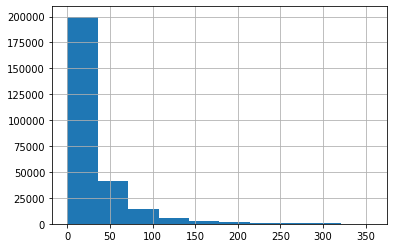

In [52]:
dff_03_past_03['mean_prdt_order_int2'].hist()

In [53]:
# 1.20일이내 2.40일이내 3.60일이내 4.80일이내 5.100일이내 6.100일초과
dff_03_past_03['mean_prdt_order_int2_gub'] = dff_03_past_03['mean_prdt_order_int2'].apply(lambda x : '1' if x < 21 else '2' if x < 41 \
                                                                                          else '3' if x < 61 else '4' if x < 81 \
                                                                                          else '5' if x < 101 else '6')

dff_03_past_03['vs_int'] = dff_03_past_03.apply(lambda x : 1 if (x['mean_prdt_order_int2'] <= x['order_interval2_y']) else 0, axis=1)

dff_03_past_03

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name,week_day2_y,order_hour_gub2_y,...,add,a1,a2,a3,a4,a5,a6,mean_prdt_order_int2,mean_prdt_order_int2_gub,vs_int
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce,6,3,...,100000,1,0,0,0,0,0,41.0,3,0
1,1,196613,4210,Whole Milk,84,milk,16,dairy eggs,6,3,...,110000,1,1,0,0,0,0,24.0,2,0
2,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs,6,3,...,111000,1,1,1,0,0,0,9.0,1,0
3,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce,6,3,...,100000,1,0,0,0,0,0,6.0,1,0
4,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce,6,3,...,110000,1,1,0,0,0,0,17.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,172548,24852,Banana,24,fresh fruits,4,produce,6,3,...,111110,1,1,1,1,1,0,8.0,1,1
268397,3,45698,24852,Banana,24,fresh fruits,4,produce,5,2,...,001000,0,0,1,0,0,0,0.0,1,1
268398,3,33804,24852,Banana,24,fresh fruits,4,produce,3,4,...,110000,1,1,0,0,0,0,21.0,2,0
268399,3,190433,24852,Banana,24,fresh fruits,4,produce,6,3,...,110000,1,1,0,0,0,0,75.0,4,0


### 바. 고객별 상품구매 요일

In [54]:
#피벗테이블 고객별 상품별 요일별 합계
df_x_past_week_sum = dff_03_past.pivot_table(index=['cstno','product_id'],columns='week_day',values='order_yn',aggfunc='sum').sort_values(['cstno','product_id'], ascending=False).fillna(0)
df_x_past_week_sum.reset_index(inplace=True)

df_x_past_week_sum['week'] = df_x_past_week_sum['0'].apply(lambda x : '1' if x > 0 else '0')\
                                   + df_x_past_week_sum['1'].apply(lambda x : '1' if x > 0 else '0')\
                                   + df_x_past_week_sum['2'].apply(lambda x : '1' if x > 0 else '0')\
                                   + df_x_past_week_sum['3'].apply(lambda x : '1' if x > 0 else '0')\
                                   + df_x_past_week_sum['4'].apply(lambda x : '1' if x > 0 else '0')\
                                   + df_x_past_week_sum['5'].apply(lambda x : '1' if x > 0 else '0')\
                                   + df_x_past_week_sum['6'].apply(lambda x : '1' if x > 0 else '0')

df_x_past_week_sum['SUN'] = df_x_past_week_sum['0'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_week_sum['MON'] = df_x_past_week_sum['1'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_week_sum['TUE'] = df_x_past_week_sum['2'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_week_sum['WED'] = df_x_past_week_sum['3'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_week_sum['THU'] = df_x_past_week_sum['4'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_week_sum['FRI'] = df_x_past_week_sum['5'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_week_sum['SAT'] = df_x_past_week_sum['6'].apply(lambda x : 1 if x > 0 else 0)

dff_03_past_04 = pd.merge(dff_03_past_03, df_x_past_week_sum[['cstno','product_id','week','SUN','MON','TUE','WED','THU','FRI','SAT']], on = ['cstno','product_id'], how = 'left')

dff_03_past_04['vs_week'] = dff_03_past_04.apply(lambda x : 1 if ((x['week_day2_y']==0) & (x['SUN']==1))\
                                                 else 1 if ((x['week_day2_y']==1) & (x['MON']==1))\
                                                 else 1 if ((x['week_day2_y']==2) & (x['TUE']==1))\
                                                 else 1 if ((x['week_day2_y']==3) & (x['WED']==1))\
                                                 else 1 if ((x['week_day2_y']==4) & (x['THU']==1))\
                                                 else 1 if ((x['week_day2_y']==5) & (x['FRI']==1))\
                                                 else 1 if ((x['week_day2_y']==6) & (x['SAT']==1))\
                                                 else 0, axis=1)

dff_03_past_04

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name,week_day2_y,order_hour_gub2_y,...,vs_int,week,SUN,MON,TUE,WED,THU,FRI,SAT,vs_week
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce,6,3,...,0,0100001,0,1,0,0,0,0,1,1
1,1,196613,4210,Whole Milk,84,milk,16,dairy eggs,6,3,...,0,0011000,0,0,1,1,0,0,0,0
2,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs,6,3,...,0,1011111,1,0,1,1,1,1,1,1
3,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce,6,3,...,0,1000001,1,0,0,0,0,0,1,1
4,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce,6,3,...,0,1000011,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,172548,24852,Banana,24,fresh fruits,4,produce,6,3,...,1,1110001,1,1,1,0,0,0,1,1
268397,3,45698,24852,Banana,24,fresh fruits,4,produce,5,2,...,1,0100000,0,1,0,0,0,0,0,0
268398,3,33804,24852,Banana,24,fresh fruits,4,produce,3,4,...,0,1111110,1,1,1,1,1,1,0,1
268399,3,190433,24852,Banana,24,fresh fruits,4,produce,6,3,...,0,1110000,1,1,1,0,0,0,0,0


### 사. 고객별 상품구매 시간

In [55]:
#피벗테이블 고객별 상품별 시간별 합계
df_x_past_hour_sum = dff_03_past.pivot_table(index=['cstno','product_id'],columns='order_hour_gub',values='order_yn',aggfunc='sum').sort_values(['cstno','product_id'], ascending=False).fillna(0)
df_x_past_hour_sum.reset_index(inplace=True)

df_x_past_hour_sum['hour'] = df_x_past_hour_sum['1'].apply(lambda x : '1' if x > 0 else '0')\
                                   + df_x_past_hour_sum['2'].apply(lambda x : '1' if x > 0 else '0')\
                                   + df_x_past_hour_sum['3'].apply(lambda x : '1' if x > 0 else '0')\
                                   + df_x_past_hour_sum['4'].apply(lambda x : '1' if x > 0 else '0')

df_x_past_hour_sum['h1'] = df_x_past_hour_sum['1'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_hour_sum['h2'] = df_x_past_hour_sum['2'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_hour_sum['h3'] = df_x_past_hour_sum['3'].apply(lambda x : 1 if x > 0 else 0)
df_x_past_hour_sum['h4'] = df_x_past_hour_sum['4'].apply(lambda x : 1 if x > 0 else 0)

dff_03_past_05 = pd.merge(dff_03_past_04, df_x_past_hour_sum[['cstno','product_id','hour','h1','h2','h3','h4']], on = ['cstno','product_id'], how = 'left')

dff_03_past_05['vs_hour'] = dff_03_past_05.apply(lambda x : 1 if ((x['order_hour_gub2_y']==1) & (x['h1']==1))\
                                                 else 1 if ((x['order_hour_gub2_y']==2) & (x['h2']==1))\
                                                 else 1 if ((x['order_hour_gub2_y']==3) & (x['h3']==1))\
                                                 else 1 if ((x['order_hour_gub2_y']==4) & (x['h4']==1))\
                                                 else 0, axis=1)

dff_03_past_05

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name,week_day2_y,order_hour_gub2_y,...,THU,FRI,SAT,vs_week,hour,h1,h2,h3,h4,vs_hour
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce,6,3,...,0,0,1,1,0100,0,1,0,0,0
1,1,196613,4210,Whole Milk,84,milk,16,dairy eggs,6,3,...,0,0,0,0,0011,0,0,1,1,1
2,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs,6,3,...,1,1,1,1,0111,0,1,1,1,1
3,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce,6,3,...,0,0,1,1,0011,0,0,1,1,1
4,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce,6,3,...,0,1,1,1,0111,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,172548,24852,Banana,24,fresh fruits,4,produce,6,3,...,0,0,1,1,0110,0,1,1,0,1
268397,3,45698,24852,Banana,24,fresh fruits,4,produce,5,2,...,0,0,0,0,0010,0,0,1,0,0
268398,3,33804,24852,Banana,24,fresh fruits,4,produce,3,4,...,1,1,0,1,0111,0,1,1,1,1
268399,3,190433,24852,Banana,24,fresh fruits,4,produce,6,3,...,0,0,0,0,0110,0,1,1,0,1


### 아. 고객별 상품별 재주문여부

In [56]:
dff_03_past_06 = dff_03_past_05.copy()
dff_03_past_06['reorder'] = dff_03_past_05['prdt_order_sum'].apply(lambda x : 1 if x > 1 else 0)
dff_03_past_06

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name,week_day2_y,order_hour_gub2_y,...,FRI,SAT,vs_week,hour,h1,h2,h3,h4,vs_hour,reorder
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce,6,3,...,0,1,1,0100,0,1,0,0,0,1
1,1,196613,4210,Whole Milk,84,milk,16,dairy eggs,6,3,...,0,0,0,0011,0,0,1,1,1,1
2,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs,6,3,...,1,1,1,0111,0,1,1,1,1,1
3,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce,6,3,...,0,1,1,0011,0,0,1,1,1,1
4,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce,6,3,...,1,1,1,0111,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,172548,24852,Banana,24,fresh fruits,4,produce,6,3,...,0,1,1,0110,0,1,1,0,1,1
268397,3,45698,24852,Banana,24,fresh fruits,4,produce,5,2,...,0,0,0,0010,0,0,1,0,0,0
268398,3,33804,24852,Banana,24,fresh fruits,4,produce,3,4,...,1,0,1,0111,0,1,1,1,1,1
268399,3,190433,24852,Banana,24,fresh fruits,4,produce,6,3,...,0,0,0,0110,0,1,1,0,1,1


### 자. 고객별 주문상품 종류수

In [57]:
cst_prdt_c = dff_03_past[['cstno','product_id']].drop_duplicates().groupby(['cstno'])['product_id'].count().reset_index(name='cst_prdt_c')
cst_categ_c = dff_03_past[['cstno','category_id']].drop_duplicates().groupby(['cstno'])['category_id'].count().reset_index(name='cst_categ_c')
cst_divi_c = dff_03_past[['cstno','division_id']].drop_duplicates().groupby(['cstno'])['division_id'].count().reset_index(name='cst_divi_c')

dff_03_past_07 = pd.merge(dff_03_past_06, cst_prdt_c, on = ['cstno'], how = 'left')
dff_03_past_07 = pd.merge(dff_03_past_07, cst_categ_c, on = ['cstno'], how = 'left')
dff_03_past_07 = pd.merge(dff_03_past_07, cst_divi_c, on = ['cstno'], how = 'left')

dff_03_past_07

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name,week_day2_y,order_hour_gub2_y,...,hour,h1,h2,h3,h4,vs_hour,reorder,cst_prdt_c,cst_categ_c,cst_divi_c
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce,6,3,...,0100,0,1,0,0,0,1,42,8,4
1,1,196613,4210,Whole Milk,84,milk,16,dairy eggs,6,3,...,0011,0,0,1,1,1,1,42,8,4
2,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs,6,3,...,0111,0,1,1,1,1,1,42,8,4
3,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce,6,3,...,0011,0,0,1,1,1,1,42,8,4
4,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce,6,3,...,0111,0,1,1,1,1,1,42,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,172548,24852,Banana,24,fresh fruits,4,produce,6,3,...,0110,0,1,1,0,1,1,28,7,3
268397,3,45698,24852,Banana,24,fresh fruits,4,produce,5,2,...,0010,0,0,1,0,0,0,27,8,5
268398,3,33804,24852,Banana,24,fresh fruits,4,produce,3,4,...,0111,0,1,1,1,1,1,12,8,5
268399,3,190433,24852,Banana,24,fresh fruits,4,produce,6,3,...,0110,0,1,1,0,1,1,27,10,5


### 차. 고객별 상품별 최근 3,10번 이내 주문여부/주문율

In [58]:
# 피벗테이블 고객별 상품별 요일별 합계

# 최근3번
df_x_past_last3_sum = dff_03_past.pivot_table(index=['cstno','product_id'],columns='order_last_3',values='order_yn',aggfunc='sum').sort_values(['cstno','product_id'], ascending=False).fillna(0)
df_x_past_last3_sum.reset_index(inplace=True)
df_x_past_last3_sum.rename(columns = {'1':'last3_order_num'}, inplace=True)
df_x_past_last3_sum['last3'] = df_x_past_last3_sum['last3_order_num'].apply(lambda x : 1 if x > 0 else 0)

dff_03_past_08 = pd.merge(dff_03_past_07, df_x_past_last3_sum[['cstno','product_id','last3','last3_order_num']], on = ['cstno','product_id'], how = 'left')
dff_03_past_08['last3_rate'] = dff_03_past_08['last3_order_num']/3 *100

# 최근10번
df_x_past_last10_sum = dff_03_past.pivot_table(index=['cstno','product_id'],columns='order_last_10',values='order_yn',aggfunc='sum').sort_values(['cstno','product_id'], ascending=False).fillna(0)
df_x_past_last10_sum.reset_index(inplace=True)
df_x_past_last10_sum.rename(columns = {'1':'last10_order_num'}, inplace=True)
df_x_past_last10_sum['last10'] = df_x_past_last10_sum['last10_order_num'].apply(lambda x : 1 if x > 0 else 0)

dff_03_past_08 = pd.merge(dff_03_past_08, df_x_past_last10_sum[['cstno','product_id','last10','last10_order_num']], on = ['cstno','product_id'], how = 'left')
dff_03_past_08['last10_rate'] = dff_03_past_08['last10_order_num']/10 *100

dff_03_past_08

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name,week_day2_y,order_hour_gub2_y,...,reorder,cst_prdt_c,cst_categ_c,cst_divi_c,last3,last3_order_num,last3_rate,last10,last10_order_num,last10_rate
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce,6,3,...,1,42,8,4,0,0.0,0.000000,0,0.0,0.0
1,1,196613,4210,Whole Milk,84,milk,16,dairy eggs,6,3,...,1,42,8,4,0,0.0,0.000000,0,0.0,0.0
2,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs,6,3,...,1,42,8,4,0,0.0,0.000000,1,2.0,20.0
3,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce,6,3,...,1,42,8,4,0,0.0,0.000000,0,0.0,0.0
4,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce,6,3,...,1,42,8,4,0,0.0,0.000000,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,172548,24852,Banana,24,fresh fruits,4,produce,6,3,...,1,28,7,3,1,3.0,100.000000,1,8.0,80.0
268397,3,45698,24852,Banana,24,fresh fruits,4,produce,5,2,...,0,27,8,5,0,0.0,0.000000,0,0.0,0.0
268398,3,33804,24852,Banana,24,fresh fruits,4,produce,3,4,...,1,12,8,5,1,2.0,66.666667,1,9.0,90.0
268399,3,190433,24852,Banana,24,fresh fruits,4,produce,6,3,...,1,27,10,5,1,1.0,33.333333,1,2.0,20.0


### 카. 상품별 전체 구매율

In [59]:
dff_03_past_09 = dff_03_past_08.copy()

# 전체주문수
all_order = dff_03_past_09[['gub','cstno','max_order_num2']].drop_duplicates().groupby(['gub'])['max_order_num2'].sum().reset_index(name='all_order_num')
dff_03_past_09 = pd.merge(dff_03_past_09, all_order, on = ['gub'], how = 'left')

# 전체 상품별주문수
all_prdt_order = dff_03_past_09.groupby(['gub','product_id'])['prdt_order_sum'].sum().reset_index(name='all_prdt_order_num')
dff_03_past_09 = pd.merge(dff_03_past_09, all_prdt_order, on = ['gub','product_id'], how = 'left')

# 상품별 구매율
dff_03_past_09['all_rate'] = dff_03_past_09['all_prdt_order_num'] / dff_03_past_09['all_order_num'] * 100
dff_03_past_09

,gub,cstno,product_id,name,category_id,category_name,division_id,division_name,week_day2_y,order_hour_gub2_y,...,cst_divi_c,last3,last3_order_num,last3_rate,last10,last10_order_num,last10_rate,all_order_num,all_prdt_order_num,all_rate
0,1,196613,41220,Organic Romaine Lettuce,83,fresh vegetables,4,produce,6,3,...,4,0,0.0,0.000000,0,0.0,0.0,382441,5905,1.544029
1,1,196613,4210,Whole Milk,84,milk,16,dairy eggs,6,3,...,4,0,0.0,0.000000,0,0.0,0.0,382441,5149,1.346351
2,1,196613,38689,Organic Reduced Fat Milk,84,milk,16,dairy eggs,6,3,...,4,0,0.0,0.000000,1,2.0,20.0,382441,8837,2.310683
3,1,196613,43122,Organic Bartlett Pear,24,fresh fruits,4,produce,6,3,...,4,0,0.0,0.000000,0,0.0,0.0,382441,9359,2.447175
4,1,196613,46906,Grape White/Green Seedless,24,fresh fruits,4,produce,6,3,...,4,0,0.0,0.000000,0,0.0,0.0,382441,7001,1.830609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,172548,24852,Banana,24,fresh fruits,4,produce,6,3,...,3,1,3.0,100.000000,1,8.0,80.0,181515,34287,18.889348
268397,3,45698,24852,Banana,24,fresh fruits,4,produce,5,2,...,5,0,0.0,0.000000,0,0.0,0.0,181515,34287,18.889348
268398,3,33804,24852,Banana,24,fresh fruits,4,produce,3,4,...,5,1,2.0,66.666667,1,9.0,90.0,181515,34287,18.889348
268399,3,190433,24852,Banana,24,fresh fruits,4,produce,6,3,...,5,1,1.0,33.333333,1,2.0,20.0,181515,34287,18.889348


In [60]:
dff_03_past_f = dff_03_past_09.copy()

## 2) 비구매 상품대상

### 가. 고객별 구매안한 상품

In [61]:
cst_list = dff_03_past[['gub','cstno']].drop_duplicates()
cst_list['gub2'] = '1'

prdt_list = df_products_info.copy()
prdt_list['gub2'] = '1'

all_order = pd.merge(cst_list, prdt_list, on = ['gub2'], how = 'outer')
all_order = all_order.drop('gub2',axis=1)

not_order = pd.merge(all_order, dff_03_past[['gub','cstno','product_id','order_yn']], on = ['gub','cstno','product_id'], how = 'left').fillna('0')
not_order = not_order[not_order['order_yn']=='0'].drop('order_yn',axis=1)

not_order

,gub,cstno,product_id,name,category_id,division_id,category_name,division_name
0,1,196613,21709,Sparkling Lemon Water,115,7,water seltzer sparkling water,beverages
1,1,196613,20995,Organic Broccoli Florets,116,1,frozen produce,frozen
2,1,196613,33000,Pure Irish Butter,36,16,butter,dairy eggs
3,1,196613,7781,Organic Sticks Low Moisture Part Skim Mozzarel...,21,16,packaged cheese,dairy eggs
4,1,196613,47144,Unsweetened Original Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs
...,...,...,...,...,...,...,...,...
2527449,3,166182,47766,Organic Avocado,24,4,fresh fruits,produce
2527450,3,166182,47209,Organic Hass Avocado,24,4,fresh fruits,produce
2527451,3,166182,21903,Organic Baby Spinach,123,4,packaged vegetables fruits,produce
2527452,3,166182,21137,Organic Strawberries,24,4,fresh fruits,produce


### 나. 전체 상품별 구매율

In [62]:
# 전체주문수
all_list = dff_03_past_f[['gub','product_id','all_rate']].drop_duplicates()
not_order_02 = pd.merge(not_order, all_list, on = ['gub','product_id'], how = 'left')
not_order_02

,gub,cstno,product_id,name,category_id,division_id,category_name,division_name,all_rate
0,1,196613,21709,Sparkling Lemon Water,115,7,water seltzer sparkling water,beverages,1.434731
1,1,196613,20995,Organic Broccoli Florets,116,1,frozen produce,frozen,1.397078
2,1,196613,33000,Pure Irish Butter,36,16,butter,dairy eggs,1.162009
3,1,196613,7781,Organic Sticks Low Moisture Part Skim Mozzarel...,21,16,packaged cheese,dairy eggs,1.621688
4,1,196613,47144,Unsweetened Original Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs,1.077813
...,...,...,...,...,...,...,...,...,...
731594,3,166182,47766,Organic Avocado,24,4,fresh fruits,produce,6.679889
731595,3,166182,47209,Organic Hass Avocado,24,4,fresh fruits,produce,8.945266
731596,3,166182,21903,Organic Baby Spinach,123,4,packaged vegetables fruits,produce,9.351293
731597,3,166182,21137,Organic Strawberries,24,4,fresh fruits,produce,11.053632


### 다. 고객 선호 카테고리 : 한번도 구매한적 없는 카테고리 제외

In [63]:
category_num = dff_03_past_09.groupby(['gub','cstno','category_id'])['prdt_order_sum'].sum().reset_index(name='category_num')
not_order_03 = pd.merge(not_order_02, category_num, on = ['gub','cstno','category_id'], how = 'left')
not_order_03 = not_order_03.dropna(subset=['category_num'], axis=0)
not_order_03

,gub,cstno,product_id,name,category_id,division_id,category_name,division_name,all_rate,category_num
0,1,196613,21709,Sparkling Lemon Water,115,7,water seltzer sparkling water,beverages,1.434731,7.0
3,1,196613,7781,Organic Sticks Low Moisture Part Skim Mozzarel...,21,16,packaged cheese,dairy eggs,1.621688,10.0
5,1,196613,41787,Bartlett Pears,24,4,fresh fruits,produce,1.472645,65.0
8,1,196613,16759,Organic Carrot Bunch,83,4,fresh vegetables,produce,1.536969,58.0
9,1,196613,9387,Granny Smith Apples,24,4,fresh fruits,produce,1.191818,65.0
...,...,...,...,...,...,...,...,...,...,...
731593,3,166182,47626,Large Lemon,24,4,fresh fruits,produce,5.498719,39.0
731594,3,166182,47766,Organic Avocado,24,4,fresh fruits,produce,6.679889,39.0
731595,3,166182,47209,Organic Hass Avocado,24,4,fresh fruits,produce,8.945266,39.0
731597,3,166182,21137,Organic Strawberries,24,4,fresh fruits,produce,11.053632,39.0


### 라. 고객별, 선호카테고리별 구매율 순위

In [64]:
#고객별 카테고리별 상품 전체 주문율 순위
not_order_03['rank1'] = not_order_03.groupby(['cstno','category_id'])['all_rate'].rank(method='first', ascending=False).astype(int).astype(str)
not_order_03.sort_values(['cstno','category_id','rank1'])

,gub,cstno,product_id,name,category_id,division_id,category_name,division_name,all_rate,category_num,rank1
139618,1,10000,33198,Sparkling Natural Mineral Water,115,7,water seltzer sparkling water,beverages,1.722880,3.0,1
139602,1,10000,21709,Sparkling Lemon Water,115,7,water seltzer sparkling water,beverages,1.434731,3.0,2
139653,1,10000,27966,Organic Raspberries,123,4,packaged vegetables fruits,produce,7.375517,11.0,1
139650,1,10000,40706,Organic Grape Tomatoes,123,4,packaged vegetables fruits,produce,3.778884,11.0,2
139649,1,10000,4920,Seedless Red Grapes,123,4,packaged vegetables fruits,produce,3.448637,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...
668769,3,99990,10749,Organic Red Bell Pepper,83,4,fresh vegetables,produce,2.368950,81.0,9
668797,3,99990,27845,Organic Whole Milk,84,16,milk,dairy eggs,5.970305,1.0,1
668734,3,99990,38689,Organic Reduced Fat Milk,84,16,milk,dairy eggs,1.456629,1.0,2
668740,3,99990,23909,2% Reduced Fat Milk,84,16,milk,dairy eggs,1.286395,1.0,3


In [65]:
#rank 1순위 내 선호카테고리 > 2순위 내 선호카테고리 순서로 순위
not_order_03 = not_order_03.sort_values(by=['cstno','rank1','category_num','all_rate'],ascending=[True,True,False,False])
not_order_03['rank2'] = not_order_03.groupby(['cstno','rank1'])[['category_num']].rank(method='first', ascending=False).astype(int).astype(str)

not_order_03['rank_temp'] = not_order_03['rank1'] + not_order_03['rank2']
not_order_03['rank_temp'] = not_order_03['rank_temp'].astype(int)

not_order_03

,gub,cstno,product_id,name,category_id,division_id,category_name,division_name,all_rate,category_num,rank1,rank2,rank_temp
139655,1,10000,26209,Limes,24,4,fresh fruits,produce,5.547522,117.0,1,1,11
139648,1,10000,30391,Organic Cucumber,83,4,fresh vegetables,produce,4.045068,85.0,1,2,12
139621,1,10000,33731,Grated Parmesan,21,16,packaged cheese,dairy eggs,2.261002,23.0,1,3,13
139640,1,10000,27086,Half & Half,53,16,cream,dairy eggs,3.360518,21.0,1,4,14
139653,1,10000,27966,Organic Raspberries,123,4,packaged vegetables fruits,produce,7.375517,11.0,1,5,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
668747,3,99990,28199,Clementines Bag,123,4,packaged vegetables fruits,produce,1.579484,5.0,7,3,73
668778,3,99990,46979,Asparagus,83,4,fresh vegetables,produce,2.589318,81.0,8,1,81
668772,3,99990,39877,Organic Granny Smith Apple,24,4,fresh fruits,produce,2.275845,42.0,8,2,82
668769,3,99990,10749,Organic Red Bell Pepper,83,4,fresh vegetables,produce,2.368950,81.0,9,1,91


In [66]:
#최종순위
not_order_03['rank'] = not_order_03.groupby(['cstno'])[['rank_temp']].rank(method='first', ascending=True).astype(int).astype(str)
not_order_03

,gub,cstno,product_id,name,category_id,division_id,category_name,division_name,all_rate,category_num,rank1,rank2,rank_temp,rank
139655,1,10000,26209,Limes,24,4,fresh fruits,produce,5.547522,117.0,1,1,11,1
139648,1,10000,30391,Organic Cucumber,83,4,fresh vegetables,produce,4.045068,85.0,1,2,12,2
139621,1,10000,33731,Grated Parmesan,21,16,packaged cheese,dairy eggs,2.261002,23.0,1,3,13,3
139640,1,10000,27086,Half & Half,53,16,cream,dairy eggs,3.360518,21.0,1,4,14,4
139653,1,10000,27966,Organic Raspberries,123,4,packaged vegetables fruits,produce,7.375517,11.0,1,5,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668747,3,99990,28199,Clementines Bag,123,4,packaged vegetables fruits,produce,1.579484,5.0,7,3,73,26
668778,3,99990,46979,Asparagus,83,4,fresh vegetables,produce,2.589318,81.0,8,1,81,27
668772,3,99990,39877,Organic Granny Smith Apple,24,4,fresh fruits,produce,2.275845,42.0,8,2,82,28
668769,3,99990,10749,Organic Red Bell Pepper,83,4,fresh vegetables,produce,2.368950,81.0,9,1,91,29


### 마. current 구매여부

In [67]:
# current 주문시 고객별, 상품별 주문여부 붙이기
not_order_04 = pd.merge(not_order_03, dff_03_current[['cstno','product_id','order_yn']].drop_duplicates(), on = ['cstno','product_id'], how = 'left').fillna(0)
not_order_04.rename(columns = {'order_yn':'product_yn_y'}, inplace=True)
not_order_04

,gub,cstno,product_id,name,category_id,division_id,category_name,division_name,all_rate,category_num,rank1,rank2,rank_temp,rank,product_yn_y
0,1,10000,26209,Limes,24,4,fresh fruits,produce,5.547522,117.0,1,1,11,1,0.0
1,1,10000,30391,Organic Cucumber,83,4,fresh vegetables,produce,4.045068,85.0,1,2,12,2,0.0
2,1,10000,33731,Grated Parmesan,21,16,packaged cheese,dairy eggs,2.261002,23.0,1,3,13,3,0.0
3,1,10000,27086,Half & Half,53,16,cream,dairy eggs,3.360518,21.0,1,4,14,4,0.0
4,1,10000,27966,Organic Raspberries,123,4,packaged vegetables fruits,produce,7.375517,11.0,1,5,15,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451993,3,99990,28199,Clementines Bag,123,4,packaged vegetables fruits,produce,1.579484,5.0,7,3,73,26,0.0
451994,3,99990,46979,Asparagus,83,4,fresh vegetables,produce,2.589318,81.0,8,1,81,27,0.0
451995,3,99990,39877,Organic Granny Smith Apple,24,4,fresh fruits,produce,2.275845,42.0,8,2,82,28,0.0
451996,3,99990,10749,Organic Red Bell Pepper,83,4,fresh vegetables,produce,2.368950,81.0,9,1,91,29,0.0


# 9.예측

## 1) 분석 변수 테이블

<font color = 'pink'> → 유의미하다고 생각되는 변수 추출하여 모형 적용\
<font color = 'pink'> → 구매시 상품을 담은 순번의 경우 값이 작을수록 선호도가 높기 때문에 값 변환 작업 실시함\
<font color = 'pink'> → 주문간격의 경우 값이 작을수록 선호도가 높기 때문에 값 변환 작업 실시함

In [68]:
tp_01 = dff_03_past_f[(dff_03_past_f['gub']=='1')|(dff_03_past_f['gub']=='3')]
tp_01 = tp_01[['gub','product_id','product_yn_y','category_yn_y','cstno','vs_int','vs_week','vs_hour','last3','last3_rate','last10','last10_rate'\
               ,'order_rate','mean_add_order3','min_add_order3','mean_prdt_order_int2']]

#값이 작을수록 좋아고 생각해서 바꿔줌
tp_01['inv_mean_add_order3'] = -1 * tp_01['mean_add_order3']
tp_01['inv_min_add_order3'] = -1 * tp_01['min_add_order3']
tp_01['inv_mean_prdt_order_int2'] = -1 * tp_01['mean_prdt_order_int2']

tp_01

,gub,product_id,product_yn_y,category_yn_y,cstno,vs_int,vs_week,vs_hour,last3,last3_rate,last10,last10_rate,order_rate,mean_add_order3,min_add_order3,mean_prdt_order_int2,inv_mean_add_order3,inv_min_add_order3,inv_mean_prdt_order_int2
0,1,41220,0.0,0.0,196613,0,1,0,0,0.000000,0,0.0,2.040816,1,1.0,41.0,-1,-1.0,-41.0
1,1,4210,0.0,0.0,196613,0,0,1,0,0.000000,0,0.0,3.061224,2,1.0,24.0,-2,-1.0,-24.0
2,1,38689,0.0,0.0,196613,0,1,1,0,0.000000,1,20.0,17.346939,2,1.0,9.0,-2,-1.0,-9.0
3,1,43122,1.0,1.0,196613,0,1,1,0,0.000000,0,0.0,2.040816,1,1.0,6.0,-1,-1.0,-6.0
4,1,46906,0.0,1.0,196613,0,1,1,0,0.000000,0,0.0,8.163265,2,1.0,17.0,-2,-1.0,-17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,24852,0.0,0.0,172548,1,1,1,1,100.000000,1,80.0,87.804878,4,1.0,8.0,-4,-1.0,-8.0
268397,3,24852,0.0,0.0,45698,1,0,0,0,0.000000,0,0.0,2.272727,5,5.0,0.0,-5,-5.0,-0.0
268398,3,24852,0.0,0.0,33804,0,1,1,1,66.666667,1,90.0,37.209302,1,1.0,21.0,-1,-1.0,-21.0
268399,3,24852,0.0,0.0,190433,0,0,1,1,33.333333,1,20.0,11.363636,2,1.0,75.0,-2,-1.0,-75.0


## 2) 정규화

<font color = 'pink'> → 최대최소화 방법으로 0~1 사이값으로 정규화

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # 0~1 구간내에 균등하게 값 배정 (최소최대기준)

tp_01_scaler = scaler.fit_transform(tp_01[['last3_rate','last10_rate','order_rate','inv_mean_add_order3','inv_min_add_order3','inv_mean_prdt_order_int2']])
tp_01_scaler = pd.DataFrame(tp_01_scaler)
tp_01_scaler.columns=['scale_last3_rate','scale_last10_rate','scale_p_rate','scale_inv_mean_add_order3','scale_inv_min_add_order3','scale_inv_mean_prdt_order_int2']
tp_01_scaler_02=tp_01_scaler.astype(np.float)

tp_02=pd.concat([tp_01[['gub','product_id','product_yn_y','cstno','vs_int','vs_week','vs_hour','last3','last10']],tp_01_scaler_02],axis=1)
tp_02.columns=['gub','product_id','product_yn_y','cstno','vs_int','vs_week','vs_hour','last3','last10'\
               ,'scale_last3_rate','scale_last10_rate','scale_p_rate','scale_inv_mean_add_order3','scale_inv_min_add_order3','scale_inv_mean_prdt_order_int2']
tp_02

,gub,product_id,product_yn_y,cstno,vs_int,vs_week,vs_hour,last3,last10,scale_last3_rate,scale_last10_rate,scale_p_rate,scale_inv_mean_add_order3,scale_inv_min_add_order3,scale_inv_mean_prdt_order_int2
0,1,41220,0.0,196613,0,1,0,0,0,0.000000,0.0,0.010412,1.000000,1.000000,0.885154
1,1,4210,0.0,196613,0,0,1,0,0,0.000000,0.0,0.020721,0.947368,1.000000,0.932773
2,1,38689,0.0,196613,0,1,1,0,1,0.000000,0.2,0.165035,0.947368,1.000000,0.974790
3,1,43122,1.0,196613,0,1,1,0,0,0.000000,0.0,0.010412,1.000000,1.000000,0.983193
4,1,46906,0.0,196613,0,1,1,0,0,0.000000,0.0,0.072262,0.947368,1.000000,0.952381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268396,3,24852,0.0,172548,1,1,1,1,1,1.000000,0.8,0.876804,0.842105,1.000000,0.977591
268397,3,24852,0.0,45698,1,0,0,0,0,0.000000,0.0,0.012755,0.789474,0.789474,1.000000
268398,3,24852,0.0,33804,0,1,1,1,1,0.666667,0.9,0.365686,1.000000,1.000000,0.941176
268399,3,24852,0.0,190433,0,0,1,1,1,0.333333,0.2,0.104592,0.947368,1.000000,0.789916


## 3) train 데이터

In [70]:
tp_02_train = tp_02[tp_02['gub']=='1']

### 가. 기존 구매 대상

#### 가) 랜덤포레스트 모형 성능 평가

<font color = 'pink'> → 종속변수 : 최근 제품 구매 여부(0,1) / 독립변수 : 유의미하다고 생각한 변수 11개 \
<font color = 'pink'> → train data 0.8 / test data 0.2로 분류

In [71]:
from sklearn.model_selection import train_test_split

x_t1 = tp_02_train.copy().drop(['product_id','product_yn_y','cstno','gub'],axis=1)
y_t1 = tp_02_train['product_yn_y']

x_train, x_test, y_train, y_test = train_test_split(x_t1
                                                    ,y_t1
                                                    ,test_size=0.2 # 20%의 데이터를 테스트용으로 유보
                                                    ,random_state=42) # 유사난수의 씨앗값 seed을 42로 설정

In [72]:
print(x_train.shape)
print(x_test.shape)

(136158, 11)
(34040, 11)


In [73]:
from sklearn.ensemble import RandomForestClassifier

#Model 생성 후 학습
rf = RandomForestClassifier(n_estimators = 100  # 트리 개수
                            #,max_depth = 10
                            #,n_jobs = 8  # 적합성과 예측성을 위해 병렬로 실행할 작업 수
                            #,max_features = 12  #노드 분할 사용 특징 최대수
                            #,min_samples_split = 5  #내부 노드 분할 최소 샘플수 default 2
                            #,min_samples_leaf = 5  #리프 노드 최소 샘플수 default 1
                            ,random_state = 12345  # 난수 seed 설정
                            #,verbose = 1 # 실행과정 출력여부
                            )  

rf.fit(X = x_train, y = y_train)

RandomForestClassifier(random_state=12345)

In [74]:
#예측
pred_y_rf = rf.predict(x_test)

print("train 정확도 : {:.4f}".format(rf.score(x_train, y_train)))
print("test 정확도 : {:.4f}".format(rf.score(x_test, y_test)))

train 정확도 : 0.9899
test 정확도 : 0.8688


<font color = 'pink'> → train과 test 모두 정확도가 높게 나오므로 해당 모형 사용 결정

#### 나) 대회제공 train 전체 예측 (모형 적용)

In [75]:
x_train_all = tp_02_train.copy().drop(['product_id','product_yn_y','cstno','gub'],axis=1)
y_train_all = tp_02_train['product_yn_y']

print(x_train_all.shape)
print(y_train_all.shape)

(170198, 11)
(170198,)


In [76]:
#예측
pred_y_rf_temp_train = rf.predict(x_train_all)

print("test 정확도 : {:.4f}".format(rf.score(x_train_all, y_train_all)))

test 정확도 : 0.9657


<font color = 'pink'> → 정확도 96.57%로 높게 나타남

In [77]:
p_pred_train = pd.DataFrame(pred_y_rf_temp_train)
p_pred_train.rename(columns = {0:'y_pred_v1'}, inplace=True)
tp_02_train_v2 = pd.concat([tp_02_train,p_pred_train],axis=1)
tp_02_train_v2

,gub,product_id,product_yn_y,cstno,vs_int,vs_week,vs_hour,last3,last10,scale_last3_rate,scale_last10_rate,scale_p_rate,scale_inv_mean_add_order3,scale_inv_min_add_order3,scale_inv_mean_prdt_order_int2,y_pred_v1
0,1,41220,0.0,196613,0,1,0,0,0,0.0,0.0,0.010412,1.000000,1.000000,0.885154,0.0
1,1,4210,0.0,196613,0,0,1,0,0,0.0,0.0,0.020721,0.947368,1.000000,0.932773,0.0
2,1,38689,0.0,196613,0,1,1,0,1,0.0,0.2,0.165035,0.947368,1.000000,0.974790,0.0
3,1,43122,1.0,196613,0,1,1,0,0,0.0,0.0,0.010412,1.000000,1.000000,0.983193,0.0
4,1,46906,0.0,196613,0,1,1,0,0,0.0,0.0,0.072262,0.947368,1.000000,0.952381,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170193,1,28204,0.0,163819,1,0,1,0,0,0.0,0.0,0.031888,0.842105,0.842105,0.983193,0.0
170194,1,16797,0.0,163819,1,0,0,0,0,0.0,0.0,0.010842,0.578947,0.578947,1.000000,0.0
170195,1,47209,0.0,163819,0,0,1,0,1,0.0,0.1,0.137117,0.842105,0.947368,0.910364,0.0
170196,1,13176,0.0,163819,0,1,1,0,0,0.0,0.0,0.305485,0.947368,1.000000,0.963585,0.0


#### 다) 중요변수 선정

scale_p_rate                      0.400972
scale_inv_mean_prdt_order_int2    0.215236
scale_last10_rate                 0.132530
scale_inv_mean_add_order3         0.071366
scale_last3_rate                  0.063629
last3                             0.039535
scale_inv_min_add_order3          0.029765
last10                            0.016742
vs_week                           0.014675
vs_hour                           0.008211
vs_int                            0.007340
dtype: float64


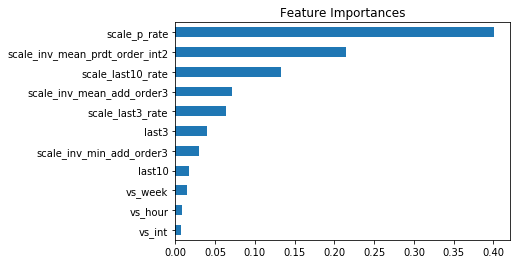

In [78]:
fe__ = pd.Series(rf.feature_importances_, index = x_t1.columns).sort_values(ascending = False)
print(fe__[::-1].sort_values(ascending = False))
fe__[::-1].plot(kind = 'barh', rot = 0)
plt.title("Feature Importances")
plt.show()

#### 라) 모형 예측 & 중요도 가중에 따른 순위

<font color = 'pink'> → 모형에서 구매할것이라 예측한 상품수보다 최근 구매 상품목록이 더 많을수도 있음\
<font color = 'pink'> → 모형 구매 예측 & 중요도 가중 적용 순위 생성 (모형 구매, 비구매 예측별 중요변수 기준 순위 생성 ⇒ 구매 1순위, 비구매 2순위로 최종 순위 생성)\
<font color = 'pink'> → 모형에 넣은 11개 변수 다 사용

In [79]:
tp_03_train = tp_02_train_v2.copy()
tp_03_train['rf_avg'] = fe__.values[0] * tp_03_train[fe__.index[0]]\
                      + fe__.values[1] * tp_03_train[fe__.index[1]]\
                      + fe__.values[2] * tp_03_train[fe__.index[2]]\
                      + fe__.values[3] * tp_03_train[fe__.index[3]]\
                      + fe__.values[4] * tp_03_train[fe__.index[4]]\
                      + fe__.values[5] * tp_03_train[fe__.index[5]]\
                      + fe__.values[6] * tp_03_train[fe__.index[6]]\
                      + fe__.values[7] * tp_03_train[fe__.index[7]]\
                      + fe__.values[8] * tp_03_train[fe__.index[8]]\
                      + fe__.values[9] * tp_03_train[fe__.index[9]]\
                      + fe__.values[10] * tp_03_train[fe__.index[10]]

tp_03_train = tp_03_train[['product_id','product_yn_y','cstno','y_pred_v1','rf_avg']+list(fe__.index[0:])]

tp_03_train = tp_03_train.sort_values(['cstno','y_pred_v1','rf_avg'], ascending=False)

tp_03_train['rank1'] = tp_03_train.groupby(['cstno'])['y_pred_v1'].rank(method='min', ascending=False).astype(int).astype(str)
tp_03_train['rank2'] = tp_03_train.groupby(['cstno','y_pred_v1'])['rf_avg'].rank(method='first', ascending=False).astype(int).astype(str)

tp_03_train['rank_temp'] = tp_03_train['rank1'] + tp_03_train['rank2']
tp_03_train['rank_temp'] = tp_03_train['rank_temp'].astype(int)

tp_03_train['rank'] = tp_03_train.groupby(['cstno'])[['rank_temp']].rank(method='first', ascending=True).astype(int).astype(str)

tp_03_train

,product_id,product_yn_y,cstno,y_pred_v1,rf_avg,scale_p_rate,scale_inv_mean_prdt_order_int2,scale_last10_rate,scale_inv_mean_add_order3,scale_last3_rate,last3,scale_inv_min_add_order3,last10,vs_week,vs_hour,vs_int,rank1,rank2,rank_temp,rank
9285,49235,1.0,99901,1.0,0.939446,0.978506,0.980392,0.8,1.000000,0.666667,1,1.000000,1,1,1,1,1,1,11,1
9286,27966,1.0,99901,1.0,0.295048,0.054277,0.647059,0.1,0.947368,0.000000,0,0.947368,1,0,1,0,1,2,12,2
9279,23909,0.0,99901,0.0,0.621169,0.183239,0.983193,0.8,1.000000,0.666667,1,1.000000,1,1,1,1,3,1,31,3
9281,34969,0.0,99901,0.0,0.552388,0.484151,0.966387,0.1,0.947368,0.000000,0,1.000000,1,1,1,0,3,2,32,4
9288,21137,0.0,99901,0.0,0.463935,0.075771,0.935574,0.3,0.894737,0.333333,1,0.947368,1,1,1,0,3,3,33,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57113,31506,0.0,10000,0.0,0.274537,0.045918,0.789916,0.0,0.789474,0.000000,0,1.000000,0,0,0,0,2,39,239,40
57119,34126,0.0,10000,0.0,0.272014,0.003827,1.000000,0.0,0.473684,0.000000,0,0.473684,0,0,0,1,2,40,240,41
57124,44359,0.0,10000,0.0,0.268196,0.017857,0.876751,0.0,0.684211,0.000000,0,0.789474,0,0,0,0,2,41,241,42
57134,24964,0.0,10000,0.0,0.244668,0.017857,0.806723,0.0,0.631579,0.000000,0,0.631579,0,0,0,0,2,42,242,43


#### 마) 순위별로 current에 적용

In [80]:
dff_03_train_02 = dff_03[(dff_03['gub']=='2')].copy()
dff_03_train_02['rank'] = dff_03_train_02.groupby(['cstno','is_reordered'])['add_order3'].rank(method='first', ascending=True).astype(int).astype(str)
dff_03_train_02 = dff_03_train_02.sort_values(['cstno','is_reordered','add_order3'], ascending=True)
dff_03_train_02_re_y = dff_03_train_02[dff_03_train_02['is_reordered']=='1']

In [81]:
dff_03_train_02_re_y = pd.merge(dff_03_train_02_re_y, tp_03_train[['cstno','product_id','rank']], on = ['cstno','rank'], how = 'left')
dff_03_train_02_re_y.rename(columns = {'product_id_x':'product_id', 'product_id_y':'pred_prdt'}, inplace=True)
dff_03_train_02_re_y

,gub,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,...,order_yn,order_hour_gub,order_hour_gub2,add_order3,last_order_num,order_num_cha,order_last_10,order_last_3,rank,pred_prdt
0,2,1925217,10000,73,4,21,6.0,3,1,21137,...,1,4,4,1.0,73,0,1,1,1,21137
1,2,805264,100001,67,1,21,7.0,1,1,3957,...,1,4,4,1.0,67,0,1,1,1,21137
2,2,805264,100001,67,1,21,7.0,3,1,35951,...,1,4,4,2.0,67,0,1,1,2,13176
3,2,805264,100001,67,1,21,7.0,5,1,39877,...,1,4,4,3.0,67,0,1,1,3,39877
4,2,805264,100001,67,1,21,7.0,8,1,34126,...,1,4,4,4.0,67,0,1,1,4,3957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22982,2,2512023,99894,49,1,21,1.0,7,1,24184,...,1,4,4,2.0,49,0,1,1,2,16797
22983,2,2512023,99894,49,1,21,1.0,8,1,43961,...,1,4,4,3.0,49,0,1,1,3,43961
22984,2,2512023,99894,49,1,21,1.0,12,1,44632,...,1,4,4,4.0,49,0,1,1,4,24184
22985,2,2921725,99901,49,4,13,8.0,3,1,49235,...,1,3,3,1.0,49,0,1,1,1,49235


### 나. 기존 비구매 대상

#### 가) 랜덤포레스트 모형 만들기

<font color = 'pink'> → 종속변수 : 최근 제품 구매 여부(0,1) / 독립변수 : 고객별 카테고리별 상품 주문율(rank1), 고객별 rank1별 선호 카테고리(rank2), rank1&rank2 결합(rank3) \
<font color = 'pink'> → train data 0.8 / test data 0.2로 분류

In [82]:
from sklearn.model_selection import train_test_split

x_t2 = not_order_04[['rank1','rank2','rank']]
y_t2 = not_order_04['product_yn_y']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_t2
                                                        ,y_t2
                                                        ,test_size=0.2 # 20%의 데이터를 테스트용으로 유보
                                                        ,random_state=42) # 유사난수의 씨앗값 seed을 42로 설정

In [83]:
print(x_train2.shape)
print(x_test2.shape)

(361598, 3)
(90400, 3)


In [84]:
from sklearn.ensemble import RandomForestClassifier

#Model 생성 후 학습
rf2 = RandomForestClassifier(n_estimators = 100  # 트리 개수
                            #,max_depth = 10
                            #,n_jobs = 8  # 적합성과 예측성을 위해 병렬로 실행할 작업 수
                            #,max_features = 12  #노드 분할 사용 특징 최대수
                            #,min_samples_split = 5  #내부 노드 분할 최소 샘플수 default 2
                            #,min_samples_leaf = 5  #리프 노드 최소 샘플수 default 1
                            ,random_state = 12345  # 난수 seed 설정
                            #,verbose = 1 # 실행과정 출력여부
                            )  

rf2.fit(X = x_train2, y = y_train2)

RandomForestClassifier(random_state=12345)

In [85]:
#예측
pred_y_rf2 = rf2.predict(x_test2)

print("train 정확도 : {:.4f}".format(rf2.score(x_train2, y_train2)))
print("test 정확도 : {:.4f}".format(rf2.score(x_test2, y_test2)))

train 정확도 : 0.9973
test 정확도 : 0.9974


<font color = 'pink'> → train과 test 모두 정확도가 높게 나오므로 해당 모형 사용 결정

#### 나) 중요변수 선정

rank     0.631669
rank1    0.300217
rank2    0.068113
dtype: float64


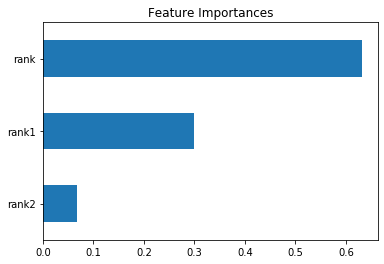

In [86]:
fe__2 = pd.Series(rf2.feature_importances_, index = x_t2.columns).sort_values(ascending = False)
print(fe__2[::-1].sort_values(ascending = False))
fe__2[::-1].plot(kind = 'barh', rot = 0)
plt.title("Feature Importances")
plt.show()

#### 다) 순위별로 current에 적용

<font color = 'pink'> → 중요변수 rank3 하나만 사용

In [87]:
dff_03_train_02_re_n = dff_03_train_02[dff_03_train_02['is_reordered']=='0']

dff_03_train_02_re_n = pd.merge(dff_03_train_02_re_n, not_order_04[['cstno','product_id','rank']], on = ['cstno','rank'], how = 'left')
dff_03_train_02_re_n.rename(columns = {'product_id_x':'product_id', 'product_id_y':'pred_prdt'}, inplace=True)
dff_03_train_02_re_n

,gub,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,...,order_yn,order_hour_gub,order_hour_gub2,add_order3,last_order_num,order_num_cha,order_last_10,order_last_3,rank,pred_prdt
0,2,334891,100247,46,4,14,2.0,7,0,8518,...,1,3,3,2.0,46,0,1,1,1,13176
1,2,900273,100811,92,4,9,2.0,5,0,30489,...,1,2,2,3.0,92,0,1,1,1,47209
2,2,2079144,100990,61,5,14,3.0,4,0,24964,...,1,3,3,3.0,61,0,1,1,1,26209
3,2,2079144,100990,61,5,14,3.0,11,0,7781,...,1,3,3,5.0,61,0,1,1,2,39275
4,2,2200214,101006,70,0,12,6.0,18,0,40706,...,1,3,3,5.0,70,0,1,1,1,13176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,2,1221647,99093,46,2,17,9.0,16,0,42736,...,1,3,3,8.0,46,0,1,1,1,21137
1433,2,1196861,99272,80,0,12,7.0,6,0,46906,...,1,3,3,5.0,80,0,1,1,1,26209
1434,2,2540872,99447,55,1,9,7.0,5,0,43352,...,1,2,2,2.0,55,0,1,1,1,13176
1435,2,169691,99500,50,1,10,10.0,32,0,33000,...,1,2,2,6.0,50,0,1,1,1,47209


### 다. 전체합

In [88]:
re_y_train = dff_03_train_02_re_y[['cstno','add_order','rank','product_id','pred_prdt']]
re_n_train = dff_03_train_02_re_n[['cstno','add_order','rank','product_id','pred_prdt']]
dff_04_train = re_y_train.append(re_n_train)
dff_04_train

,cstno,add_order,rank,product_id,pred_prdt
0,10000,3,1,21137,21137
1,100001,1,1,3957,21137
2,100001,3,2,35951,13176
3,100001,5,3,39877,39877
4,100001,8,4,34126,3957
...,...,...,...,...,...
1432,99093,16,1,42736,21137
1433,99272,6,1,46906,26209
1434,99447,5,1,43352,13176
1435,99500,32,1,33000,47209


In [89]:
dff_04_train.isnull().sum()

cstno         0
add_order     0
rank          0
product_id    0
pred_prdt     0
dtype: int64

### 라. 고객리스트별 정확도

In [90]:
train_cu_df = dff_04_train.groupby('cstno')['product_id'].apply(set).reset_index()
train_cu_df.columns = ['cstno','real_p']

train_cu_pred_y = dff_04_train.groupby('cstno')['pred_prdt'].apply(set).reset_index()
train_cu_pred_y.columns = ['cstno','pred_p']
train_cu_df = pd.merge(train_cu_df, train_cu_pred_y, on = ['cstno'], how = 'left')

train_cu_df

,cstno,real_p,pred_p
0,10000,{21137},{21137}
1,100001,"{21903, 35951, 21137, 39877, 3957, 34126, 2796...","{21903, 35951, 21137, 39877, 3957, 27966, 2710..."
2,100046,"{26604, 47626}","{26604, 47626}"
3,100071,"{27521, 41220, 19660, 22935, 34126, 27104, 30391}","{27521, 41220, 19660, 22935, 34126, 27104, 30391}"
4,100108,"{47209, 13176, 19057}","{47209, 13176, 19057}"
...,...,...,...
5854,9981,"{49235, 23909, 24852}","{49235, 23909, 24852}"
5855,99829,"{4605, 10749}","{4605, 10749}"
5856,99887,"{39928, 30391, 45007, 9839, 16759, 19057, 2710...","{39928, 30391, 45007, 9839, 16759, 19057, 2710..."
5857,99894,"{44632, 43961, 24184, 16797}","{44632, 43961, 24184, 16797}"


In [91]:
# recall 함수

def calculated_recall(real_order, pred_order):
    true_positive=0
    for prdt_code in pred_order:
        if prdt_code in real_order:
            true_positive +=1
            
    recall = true_positive / len(real_order) # 원래 pred_order 이었는데 real_order가 맞지않을까??? 흠...
    return recall

In [92]:
# 고객별 recall
train_cu_df['recall'] = train_cu_df.apply(lambda x: calculated_recall(x['real_p'],x['pred_p']),axis=1)   
train_cu_df

,cstno,real_p,pred_p,recall
0,10000,{21137},{21137},1.000000
1,100001,"{21903, 35951, 21137, 39877, 3957, 34126, 2796...","{21903, 35951, 21137, 39877, 3957, 27966, 2710...",0.888889
2,100046,"{26604, 47626}","{26604, 47626}",1.000000
3,100071,"{27521, 41220, 19660, 22935, 34126, 27104, 30391}","{27521, 41220, 19660, 22935, 34126, 27104, 30391}",1.000000
4,100108,"{47209, 13176, 19057}","{47209, 13176, 19057}",1.000000
...,...,...,...,...
5854,9981,"{49235, 23909, 24852}","{49235, 23909, 24852}",1.000000
5855,99829,"{4605, 10749}","{4605, 10749}",1.000000
5856,99887,"{39928, 30391, 45007, 9839, 16759, 19057, 2710...","{39928, 30391, 45007, 9839, 16759, 19057, 2710...",1.000000
5857,99894,"{44632, 43961, 24184, 16797}","{44632, 43961, 24184, 16797}",1.000000


In [93]:
# 고객별 recall 평균
print(train_cu_df['recall'].mean())

0.759008922654596


In [94]:
# precision 함수

def calculated_precision(real_order, pred_order):
    true_positive=0
    for prdt_code in real_order:
        if prdt_code in pred_order:
            true_positive +=1
            
    precision = true_positive / len(pred_order)
    return precision

In [95]:
# 고객별 precision
train_cu_df['precision'] = train_cu_df.apply(lambda x: calculated_precision(x['real_p'],x['pred_p']),axis=1)   
train_cu_df

,cstno,real_p,pred_p,recall,precision
0,10000,{21137},{21137},1.000000,1.000000
1,100001,"{21903, 35951, 21137, 39877, 3957, 34126, 2796...","{21903, 35951, 21137, 39877, 3957, 27966, 2710...",0.888889,0.888889
2,100046,"{26604, 47626}","{26604, 47626}",1.000000,1.000000
3,100071,"{27521, 41220, 19660, 22935, 34126, 27104, 30391}","{27521, 41220, 19660, 22935, 34126, 27104, 30391}",1.000000,1.000000
4,100108,"{47209, 13176, 19057}","{47209, 13176, 19057}",1.000000,1.000000
...,...,...,...,...,...
5854,9981,"{49235, 23909, 24852}","{49235, 23909, 24852}",1.000000,1.000000
5855,99829,"{4605, 10749}","{4605, 10749}",1.000000,1.000000
5856,99887,"{39928, 30391, 45007, 9839, 16759, 19057, 2710...","{39928, 30391, 45007, 9839, 16759, 19057, 2710...",1.000000,1.000000
5857,99894,"{44632, 43961, 24184, 16797}","{44632, 43961, 24184, 16797}",1.000000,1.000000


In [96]:
# 고객별 precision 평균
print(train_cu_df['precision'].mean())

0.759008922654596


In [97]:
# 고객별 F1
train_cu_df['F1'] = (2 * train_cu_df['precision'] * train_cu_df['recall'] / (train_cu_df['precision']+train_cu_df['recall'])).fillna(0)
train_cu_df

,cstno,real_p,pred_p,recall,precision,F1
0,10000,{21137},{21137},1.000000,1.000000,1.000000
1,100001,"{21903, 35951, 21137, 39877, 3957, 34126, 2796...","{21903, 35951, 21137, 39877, 3957, 27966, 2710...",0.888889,0.888889,0.888889
2,100046,"{26604, 47626}","{26604, 47626}",1.000000,1.000000,1.000000
3,100071,"{27521, 41220, 19660, 22935, 34126, 27104, 30391}","{27521, 41220, 19660, 22935, 34126, 27104, 30391}",1.000000,1.000000,1.000000
4,100108,"{47209, 13176, 19057}","{47209, 13176, 19057}",1.000000,1.000000,1.000000
...,...,...,...,...,...,...
5854,9981,"{49235, 23909, 24852}","{49235, 23909, 24852}",1.000000,1.000000,1.000000
5855,99829,"{4605, 10749}","{4605, 10749}",1.000000,1.000000,1.000000
5856,99887,"{39928, 30391, 45007, 9839, 16759, 19057, 2710...","{39928, 30391, 45007, 9839, 16759, 19057, 2710...",1.000000,1.000000,1.000000
5857,99894,"{44632, 43961, 24184, 16797}","{44632, 43961, 24184, 16797}",1.000000,1.000000,1.000000


In [98]:
# 고객별 F1 평균
print(train_cu_df['F1'].mean())

0.759008922654596


In [99]:
from sklearn.metrics import accuracy_score, recall_score, precision_score \
                            , roc_curve, roc_auc_score, average_precision_score \
                            , confusion_matrix

In [100]:
#1대 1일 순서까지 반영한 평가
accuracy = accuracy_score(y_true=dff_04_train['product_id'], y_pred=dff_04_train['pred_prdt'])
recall = recall_score(y_true=dff_04_train['product_id'], y_pred=dff_04_train['pred_prdt'], average='macro') #다항이라 average='macro' 넣어줘야함)
precision = precision_score(y_true=dff_04_train['product_id'], y_pred=dff_04_train['pred_prdt'], average='macro') #다항이라 average='macro' 넣어줘야함)

f1 =   2 * (recall * precision) / (recall + precision + 1e-5)

print("ACC\t : {accuracy: .4f}".format(accuracy = accuracy))
print("REC\t : {recall: .4f}".format(recall = recall))
print("PRC\t : {precision: .4f}".format(precision = precision))
print("F1\t : {f1: .4f}".format(f1 = f1))

ACC	 :  0.2759
REC	 :  0.2566
PRC	 :  0.2733
F1	 :  0.2647


## 4) test 데이터

In [101]:
tp_02_test = tp_02[tp_02['gub']=='3']

### 가. 기존 구매 대상

#### 가) test 전체 예측 (모형 적용)

In [102]:
x_test_all = tp_02_test.copy().drop(['product_id','product_yn_y','cstno','gub'],axis=1)
x_test_all.reset_index()

print(x_test_all.shape)

(98203, 11)


In [103]:
#예측
pred_y_rf_temp_test = rf.predict(x_test_all)

In [104]:
p_pred_test = pd.DataFrame(pred_y_rf_temp_test)
p_pred_test.rename(columns = {0:'y_pred_v1'}, inplace=True)
tp_02_test_v2 = pd.concat([tp_02_test.reset_index(),p_pred_test],axis=1)
tp_02_test_v2

,index,gub,product_id,product_yn_y,cstno,vs_int,vs_week,vs_hour,last3,last10,scale_last3_rate,scale_last10_rate,scale_p_rate,scale_inv_mean_add_order3,scale_inv_min_add_order3,scale_inv_mean_prdt_order_int2,y_pred_v1
0,170198,3,21709,0.0,186630,0,1,1,1,1,0.666667,0.3,0.494898,0.947368,1.000000,0.980392,0.0
1,170199,3,21709,0.0,153668,0,0,1,0,1,0.000000,0.2,0.063713,0.894737,1.000000,0.887955,0.0
2,170200,3,21709,0.0,126077,0,0,1,1,1,0.333333,0.2,0.045918,0.842105,0.894737,0.845938,0.0
3,170201,3,21709,0.0,16032,0,1,1,0,1,0.000000,0.2,0.105248,0.842105,1.000000,0.789916,0.0
4,170202,3,21709,0.0,71952,0,1,1,0,0,0.000000,0.0,0.255639,0.947368,1.000000,0.960784,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98198,268396,3,24852,0.0,172548,1,1,1,1,1,1.000000,0.8,0.876804,0.842105,1.000000,0.977591,1.0
98199,268397,3,24852,0.0,45698,1,0,0,0,0,0.000000,0.0,0.012755,0.789474,0.789474,1.000000,0.0
98200,268398,3,24852,0.0,33804,0,1,1,1,1,0.666667,0.9,0.365686,1.000000,1.000000,0.941176,1.0
98201,268399,3,24852,0.0,190433,0,0,1,1,1,0.333333,0.2,0.104592,0.947368,1.000000,0.789916,0.0


#### 나) 모형 예측 & 중요도 가중에 따른 순위

In [105]:
tp_03_test = tp_02_test_v2.copy()
tp_03_test['rf_avg'] = fe__.values[0] * tp_03_test[fe__.index[0]]\
                      + fe__.values[1] * tp_03_test[fe__.index[1]]\
                      + fe__.values[2] * tp_03_test[fe__.index[2]]\
                      + fe__.values[3] * tp_03_test[fe__.index[3]]\
                      + fe__.values[4] * tp_03_test[fe__.index[4]]\
                      + fe__.values[5] * tp_03_test[fe__.index[5]]\
                      + fe__.values[6] * tp_03_test[fe__.index[6]]\
                      + fe__.values[7] * tp_03_test[fe__.index[7]]\
                      + fe__.values[8] * tp_03_test[fe__.index[8]]\
                      + fe__.values[9] * tp_03_test[fe__.index[9]]\
                      + fe__.values[10] * tp_03_test[fe__.index[10]]

tp_03_test = tp_03_test[['product_id','product_yn_y','cstno','y_pred_v1','rf_avg']+list(fe__.index[0:])]

tp_03_test = tp_03_test.sort_values(['cstno','y_pred_v1','rf_avg'], ascending=False)

tp_03_test['rank1'] = tp_03_test.groupby(['cstno'])['y_pred_v1'].rank(method='min', ascending=False).astype(int).astype(str)
tp_03_test['rank2'] = tp_03_test.groupby(['cstno','y_pred_v1'])['rf_avg'].rank(method='first', ascending=False).astype(int).astype(str)

tp_03_test['rank_temp'] = tp_03_test['rank1'] + tp_03_test['rank2']
tp_03_test['rank_temp'] = tp_03_test['rank_temp'].astype(int)

tp_03_test['rank'] = tp_03_test.groupby(['cstno'])[['rank_temp']].rank(method='first', ascending=True).astype(int).astype(str)

tp_03_test

,product_id,product_yn_y,cstno,y_pred_v1,rf_avg,scale_p_rate,scale_inv_mean_prdt_order_int2,scale_last10_rate,scale_inv_mean_add_order3,scale_last3_rate,last3,scale_inv_min_add_order3,last10,vs_week,vs_hour,vs_int,rank1,rank2,rank_temp,rank
75613,22935,0.0,99990,1.0,0.609701,0.399338,0.941176,0.4,0.894737,0.333333,1,1.000000,1,1,1,0,1,1,11,1
27380,48679,0.0,99990,1.0,0.465374,0.153613,0.851541,0.2,0.894737,0.333333,1,1.000000,1,1,1,0,1,2,12,2
73864,24964,0.0,99990,1.0,0.441736,0.208218,0.904762,0.2,0.947368,0.000000,0,1.000000,1,1,1,0,1,3,13,3
60535,45066,0.0,99990,0.0,0.641063,0.372035,0.935574,0.7,0.947368,0.333333,1,1.000000,1,1,1,0,4,1,41,4
48823,31717,0.0,99990,0.0,0.620725,0.372035,0.946779,0.5,1.000000,0.333333,1,1.000000,1,1,1,0,4,2,42,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52972,17794,0.0,100041,0.0,0.306568,0.040306,0.921569,0.0,0.894737,0.000000,0,0.947368,0,0,0,0,2,24,224,25
80891,26209,0.0,100041,0.0,0.303128,0.015051,1.000000,0.0,0.736842,0.000000,0,0.736842,0,0,0,1,2,25,225,26
38558,22035,0.0,100041,0.0,0.301468,0.065561,0.907563,0.0,0.789474,0.000000,0,0.789474,0,0,0,0,2,26,226,27
26008,31506,0.0,100041,0.0,0.279247,0.040306,0.775910,0.0,0.789474,0.000000,0,0.842105,0,1,0,0,2,27,227,28


#### 다) 순위별로 current에 적용

In [106]:
dff_03_test_02 = dff_03[(dff_03['gub']=='4')].copy()
dff_03_test_02['rank'] = dff_03_test_02.groupby(['cstno','is_reordered'])['add_order3'].rank(method='first', ascending=True).astype(int).astype(str)
dff_03_test_02 = dff_03_test_02.sort_values(['cstno','is_reordered','add_order3'], ascending=True)
dff_03_test_02_re_y = dff_03_test_02[dff_03_test_02['is_reordered']=='1']

In [107]:
dff_03_test_02_re_y = pd.merge(dff_03_test_02_re_y, tp_03_test[['cstno','product_id','rank']], on = ['cstno','rank'], how = 'left')
dff_03_test_02_re_y.rename(columns = {'product_id_x':'product_id', 'product_id_y':'pred_prdt'}, inplace=True)
dff_03_test_02_re_y

,gub,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,...,order_yn,order_hour_gub,order_hour_gub2,add_order3,last_order_num,order_num_cha,order_last_10,order_last_3,rank,pred_prdt
0,4,523902,100041,41,6,8,8.0,9,1,NaN,...,1,2,2,1.0,41,0,1,1,1,34358
1,4,523902,100041,41,6,8,8.0,10,1,NaN,...,1,2,2,2.0,41,0,1,1,2,13176
2,4,523902,100041,41,6,8,8.0,11,1,NaN,...,1,2,2,3.0,41,0,1,1,3,44632
3,4,523902,100041,41,6,8,8.0,13,1,NaN,...,1,2,2,4.0,41,0,1,1,4,27521
4,4,523902,100041,41,6,8,8.0,14,1,NaN,...,1,2,2,5.0,41,0,1,1,5,21903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14652,4,2705069,99990,38,0,11,8.0,1,1,NaN,...,1,2,2,1.0,38,0,1,1,1,22935
14653,4,2705069,99990,38,0,11,8.0,2,1,NaN,...,1,2,2,2.0,38,0,1,1,2,48679
14654,4,2705069,99990,38,0,11,8.0,3,1,NaN,...,1,2,2,3.0,38,0,1,1,3,24964
14655,4,2705069,99990,38,0,11,8.0,5,1,NaN,...,1,2,2,4.0,38,0,1,1,4,45066


### 나. 기존 비구매 대상 

#### 가) 순위별로 current에 적용

In [108]:
dff_03_test_02_re_n = dff_03_test_02[dff_03_test_02['is_reordered']=='0']
dff_03_test_02_re_n = pd.merge(dff_03_test_02_re_n, not_order_03[['cstno','product_id','rank']], on = ['cstno','rank'], how = 'left')
dff_03_test_02_re_n.rename(columns = {'product_id_x':'product_id', 'product_id_y':'pred_prdt'}, inplace=True)
dff_03_test_02_re_n

,gub,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,product_id,...,order_yn,order_hour_gub,order_hour_gub2,add_order3,last_order_num,order_num_cha,order_last_10,order_last_3,rank,pred_prdt
0,4,1538533,100359,37,0,9,4.0,1,0,NaN,...,1,2,2,1.0,37,0,1,1,1,47209
1,4,3411504,100414,63,0,15,4.0,4,0,NaN,...,1,3,3,2.0,63,0,1,1,1,13176
2,4,3411504,100414,63,0,15,4.0,39,0,NaN,...,1,3,3,5.0,63,0,1,1,2,18465
3,4,764264,100508,42,6,13,20.0,2,0,NaN,...,1,3,3,2.0,42,0,1,1,1,47626
4,4,764264,100508,42,6,13,20.0,3,0,NaN,...,1,3,3,3.0,42,0,1,1,2,22935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,4,1586149,99459,51,1,7,16.0,8,0,NaN,...,1,2,2,5.0,51,0,1,1,3,27966
1465,4,1586149,99459,51,1,7,16.0,10,0,NaN,...,1,2,2,7.0,51,0,1,1,4,34126
1466,4,1586149,99459,51,1,7,16.0,17,0,NaN,...,1,2,2,10.0,51,0,1,1,5,42736
1467,4,3061434,99897,40,0,13,9.0,8,0,NaN,...,1,3,3,4.0,40,0,1,1,1,28985


### 다. 전체합

In [109]:
re_y_test = dff_03_test_02_re_y[['cstno','add_order','rank','product_id','pred_prdt']]
re_n_test = dff_03_test_02_re_n[['cstno','add_order','rank','product_id','pred_prdt']]
dff_04_test = re_y_test.append(re_n_test)
dff_04_test

,cstno,add_order,rank,product_id,pred_prdt
0,100041,9,1,NaN,34358
1,100041,10,2,NaN,13176
2,100041,11,3,NaN,44632
3,100041,13,4,NaN,27521
4,100041,14,5,NaN,21903
...,...,...,...,...,...
1464,99459,8,3,NaN,27966
1465,99459,10,4,NaN,34126
1466,99459,17,5,NaN,42736
1467,99897,8,1,NaN,28985


# 10. 최종제출 데이터

In [110]:
df_test_x_current_02 = df_test_x_current.copy()
df_test_x_current_02['seq'] = df_test_x_current_02.index

df_test_x_current_02 = pd.merge(df_test_x_current_02, dff_04_test[['cstno','add_order','pred_prdt']], on = ['cstno','add_order'], how = 'left')
df_test_x_current_02 = df_test_x_current_02.sort_values('seq')
df_test_x_current_02

,order_id,cstno,order_number,week_day,order_hour,order_interval,add_order,is_reordered,seq,pred_prdt
0,3384204,37987,38,5,16,13.0,9,1,0,27845
1,2578612,169022,38,6,10,7.0,4,1,1,35951
2,188887,200090,45,5,16,30.0,5,1,2,44632
3,646772,149416,39,1,13,13.0,15,1,3,26604
4,300214,113836,42,3,10,17.0,1,1,4,47209
...,...,...,...,...,...,...,...,...,...,...
16121,2047884,57077,46,5,15,8.0,2,1,16121,24852
16122,567625,83592,43,4,12,0.0,1,1,16122,24852
16123,596442,157740,49,6,10,3.0,2,1,16123,27086
16124,671102,92043,43,4,10,10.0,1,1,16124,24852


In [111]:
df_test_x_current_02.isnull().sum()

order_id          0
cstno             0
order_number      0
week_day          0
order_hour        0
order_interval    0
add_order         0
is_reordered      0
seq               0
pred_prdt         0
dtype: int64

In [112]:
df_test_y = pd.DataFrame(df_test_x_current_02['pred_prdt'])
df_test_y.rename(columns = {'pred_prdt':'product_id'}, inplace=True)
df_test_y

,product_id
0,27845
1,35951
2,44632
3,26604
4,47209
...,...
16121,24852
16122,24852
16123,27086
16124,24852


In [113]:
# 최종 test y '.csv' 저장
df_test_y.to_csv(f'./test_y.csv', encoding='UTF-8')

In [116]:
# 최종 test y '.csv' 저장
df_test_x_current = df_test_x_current_02.drop(['seq','pred_prdt'],axis=1)
df_test_x_current.to_csv(f'./df_test_x_current.csv', encoding='UTF-8')

# End